In [1]:
import pandas as pd
import numpy as np

from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/train_1.csv')

In [3]:
df.shape

(145063, 551)

In [4]:
# Each row represent the traffic of ONE articles from 2015-07-01 to 2016-12-31 (550 days)
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
articles_with_null = df.isnull().sum(axis=1)
print(f"Rows with null values: {(articles_with_null > 0).sum()}")

df = df.dropna()

Rows with null values: 27786


In [6]:
dates = df.drop(columns=['Page'])
foo = df[['Page']].reset_index()
foo.head()

,index,Page
0,0,2NE1_zh.wikipedia.org_all-access_spider
1,1,2PM_zh.wikipedia.org_all-access_spider
2,2,3C_zh.wikipedia.org_all-access_spider
3,3,4minute_zh.wikipedia.org_all-access_spider
4,5,5566_zh.wikipedia.org_all-access_spider


In [7]:
mediawiki = foo[foo['Page'].str.contains("mediawiki")]
wikimedia = foo[foo['Page'].str.contains("wikimedia")]

wikipedia = foo[foo['Page'].str.contains("wikipedia")& 
                ~foo['Page'].str.contains("wikimedia") & 
                ~foo['Page'].str.contains("mediawiki")]

In [8]:
wikipedia[['foo', 'bar']] = wikipedia['Page'].str.split(r'\.wikipedia.org_', expand = True) # remove "\.wikipedia.org_"
wikipedia[['article', 'locale']] = wikipedia['foo'].str.extract(r'(.+)(.{2})$') # Split foo into 2 parts
wikipedia[['access', 'agent']] = wikipedia['bar'].str.split('_', expand=True) # Split bar into 2 parts
# wikipedia['locale'] = wikipedia['locale'].str[1:3]
wikipedia.head()

,index,Page,foo,bar,article,locale,access,agent
0,0,2NE1_zh.wikipedia.org_all-access_spider,2NE1_zh,all-access_spider,2NE1_,zh,all-access,spider
1,1,2PM_zh.wikipedia.org_all-access_spider,2PM_zh,all-access_spider,2PM_,zh,all-access,spider
2,2,3C_zh.wikipedia.org_all-access_spider,3C_zh,all-access_spider,3C_,zh,all-access,spider
3,3,4minute_zh.wikipedia.org_all-access_spider,4minute_zh,all-access_spider,4minute_,zh,all-access,spider
4,5,5566_zh.wikipedia.org_all-access_spider,5566_zh,all-access_spider,5566_,zh,all-access,spider


In [9]:
wikimedia[['article', 'bar']] = wikimedia['Page'].str.split('_commons.wikimedia.org_', expand=True)
wikimedia[['access', 'agent']] = wikimedia['bar'].str.split('_', expand=True)
wikimedia['locale'] = 'wikmed'
wikimedia.head()

,index,Page,article,bar,access,agent,locale
11045,13332,Accueil_commons.wikimedia.org_all-access_spider,Accueil,all-access_spider,all-access,spider,wikmed
11046,13333,Atlas_of_Asia_commons.wikimedia.org_all-access...,Atlas_of_Asia,all-access_spider,all-access,spider,wikmed
11047,13334,Atlas_of_Europe_commons.wikimedia.org_all-acce...,Atlas_of_Europe,all-access_spider,all-access,spider,wikmed
11048,13335,Atlas_of_World_War_II_commons.wikimedia.org_al...,Atlas_of_World_War_II,all-access_spider,all-access,spider,wikmed
11049,13336,Atlas_of_colonialism_commons.wikimedia.org_all...,Atlas_of_colonialism,all-access_spider,all-access,spider,wikmed


In [10]:
mediawiki[['article', 'bar']] = mediawiki['Page'].str.split('_www.mediawiki.org_', expand=True)
mediawiki[['access', 'agent']] = mediawiki['bar'].str.split('_', expand=True)
mediawiki['locale'] = 'medwik'
mediawiki.head()

,index,Page,article,bar,access,agent,locale
15772,19614,API_www.mediawiki.org_all-access_all-agents,API,all-access_all-agents,all-access,all-agents,medwik
15773,19615,API:Account_creation_www.mediawiki.org_all-acc...,API:Account_creation,all-access_all-agents,all-access,all-agents,medwik
15774,19616,API:Allimages_www.mediawiki.org_all-access_all...,API:Allimages,all-access_all-agents,all-access,all-agents,medwik
15775,19617,API:Allpages_www.mediawiki.org_all-access_all-...,API:Allpages,all-access_all-agents,all-access,all-agents,medwik
15776,19618,API:Backlinks_www.mediawiki.org_all-access_all...,API:Backlinks,all-access_all-agents,all-access,all-agents,medwik


In [11]:
features = ['index', 'article', 'locale', 'access', 'agent']
pages = pd.concat([wikipedia[features], wikimedia[features], mediawiki[features]], axis = 0)
pages.shape
pages.head()

,index,article,locale,access,agent
0,0,2NE1_,zh,all-access,spider
1,1,2PM_,zh,all-access,spider
2,2,3C_,zh,all-access,spider
3,3,4minute_,zh,all-access,spider
4,5,5566_,zh,all-access,spider


In [12]:
def extract_ts(rownr):
    
    '''
    Filter row by index and transform the row data in a new dataframe
    '''
    
    df = dates.reset_index().rename(columns={'index': 'rowname'})
    df_filtered = df[df['rowname'] == rownr].transpose().iloc[1:]
    df_filtered.columns = ['views']
    df_filtered = df_filtered.reset_index()
    df_filtered['dates'] = pd.to_datetime(df_filtered['index'])
    df_filtered.drop(['index'], axis = 1, inplace = True)
    return df_filtered

#     df = tdates.reset_index().rename(columns={'index': 'rowname'})
#     df_filtered = df[df['rowname'] == rownr]
#     df_gathered = df_filtered.melt(id_vars=['rowname'], var_name='dates', value_name='value')
#     df_spread = df_gathered.pivot(index='dates', columns='rowname', values='value').reset_index()
#     df_spread['dates'] = pd.to_datetime(df_spread['dates'])
#     df_spread = df_spread.rename(columns={rownr: 'views'})
#     return df_spread

def extract_ts_nrm(rownr):
    df = dates.reset_index().rename(columns={'index': 'rowname'})
    df_filtered = df[df['rowname'] == rownr]
    df_gathered = df_filtered.melt(id_vars=['rowname'], var_name='dates', value_name='value')
    df_spread = df_gathered.pivot(index='dates', columns='rowname', values='value').reset_index()
    df_spread['dates'] = pd.to_datetime(df_spread['dates'])
    df_spread = df_spread.rename(columns={rownr: 'views'})
    df_spread['views'] = df_spread['views'] / df_spread['views'].mean()
    return df_spread

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from statsmodels.nonparametric.smoothers_lowess import lowess

def plot_rownr(rownr):
    art = pages.loc[pages['index'] == rownr, 'article'].values[0]
    loc = pages.loc[pages['index'] == rownr, 'locale'].values[0]
    acc = pages.loc[pages['index'] == rownr, 'access'].values[0]
    df = extract_ts(rownr)

    df['dates_ordinal'] = df['dates'].map(pd.Timestamp.toordinal)
    
    plt.figure(figsize=(15, 8))

    sns.lineplot(data=df, x='dates', y='views', label='Views')
    loess_smoothed = lowess(df['views'], df['dates_ordinal'], frac=0.2)  # Adjust frac for smoothing, 0.2 = 1/5
    
    smoothed_dates = [pd.Timestamp.fromordinal(int(d)) for d in loess_smoothed[:, 0]]
    plt.plot(smoothed_dates, loess_smoothed[:, 1], color='blue', label='LOESS Smoothing')

    plt.xticks(rotation=45)

    plt.title(f"{art} - {loc} - {acc}")
    plt.xlabel('Dates')
    plt.ylabel('Views')

    plt.legend()
    plt.show()
    
def plot_rownr_log(rownr):
    art = pages.loc[pages['index'] == rownr, 'article'].values[0]
    loc = pages.loc[pages['index'] == rownr, 'locale'].values[0]
    acc = pages.loc[pages['index'] == rownr, 'access'].values[0]
    df = extract_ts_nrm(rownr)
    
    df['dates_ordinal'] = df['dates'].map(pd.Timestamp.toordinal)
    
    plt.figure(figsize=(10, 6))
    
    sns.lineplot(data=df, x='dates', y='views')
    
    loess_smoothed = lowess(df['views'], df['dates_ordinal'], frac=0.2)  # Adjust frac for smoothing, 0.2 = 1/5
    smoothed_dates = [pd.Timestamp.fromordinal(int(d)) for d in loess_smoothed[:, 0]]
    plt.plot(smoothed_dates, loess_smoothed[:, 1], color='blue', label='LOESS Smoothing')
    
#     sns.regplot(data=df, x='dates', y='views', scatter=False, lowess=True, color='blue')
    plt.yscale('log')
    plt.title(f"{art} - {loc} - {acc}")
    plt.xlabel('Dates')
    plt.ylabel('Log Views')
    plt.show()
    
    
def plot_rownr_zoom(rownr, start, end):
    art = pages.loc[pages['index'] == rownr, 'article'].values[0]
    loc = pages.loc[pages['index'] == rownr, 'locale'].values[0]
    acc = pages.loc[pages['index'] == rownr, 'access'].values[0]
    df = extract_ts(rownr)
    df_filtered = df[(df['dates'] > pd.to_datetime(start)) & (df['dates'] <= pd.to_datetime(end))]
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_filtered, x='dates', y='views')
    plt.title(f"{art} - {loc} - {acc}")
    plt.xlabel('Dates')
    plt.ylabel('Views')
    plt.show()

# pages.loc[pages['index'] == 11214, 'article'].values[0]

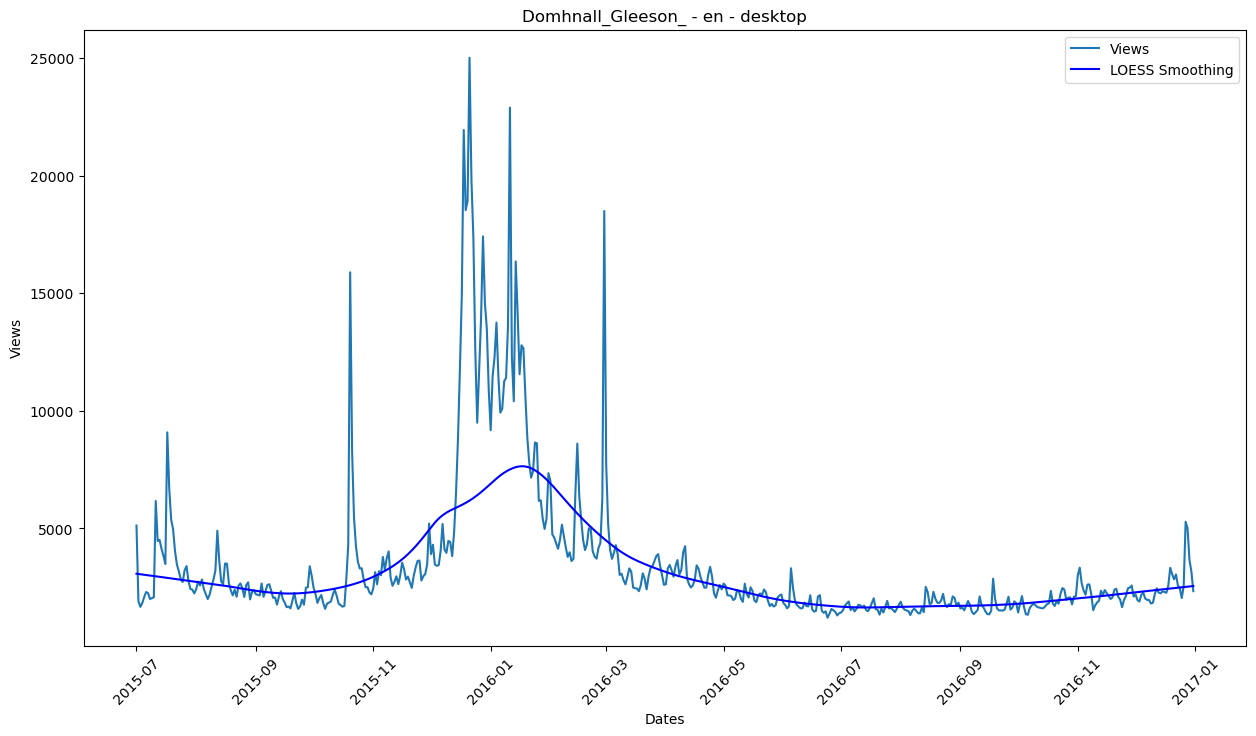

In [14]:
plot_rownr(11214)

In [15]:
def plot_names(art, acc, ag):
    pick = pages[(pages['article'].str.contains(art)) & 
                  (pages['access'] == acc) & 
                  (pages['agent'] == ag)]
    pick_nr = pick['index'].values
    pick_loc = pick['locale'].values

    tdat = extract_ts(pick_nr[0])
    tdat['loc'] = pick_loc[0]

    for i in range(1, len(pick_nr)):
        foo = extract_ts(pick_nr[i])
        foo['loc'] = pick_loc[i]
        tdat = pd.concat([tdat, foo], ignore_index=True)

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=tdat, x='dates', y='views', hue='loc')
    plt.title(f"{art} - {acc} - {ag}")
    plt.xlabel('Dates')
    plt.ylabel('Views')
    plt.show()
    
def plot_names_nrm(art, acc, ag):
    pick = pages[(pages['article'].str.contains(art)) & 
                  (pages['access'] == acc) & 
                  (pages['agent'] == ag)]
    pick_nr = pick['index'].values
    pick_loc = pick['locale'].values

    tdat = extract_ts_nrm(pick_nr[0])
    tdat['loc'] = pick_loc[0]

    for i in range(1, len(pick_nr)):
        foo = extract_ts_nrm(pick_nr[i])
        foo['loc'] = pick_loc[i]
        tdat = pd.concat([tdat, foo], ignore_index=True)

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=tdat, x='dates', y='views', hue='loc')
    plt.yscale('log')
    plt.title(f"{art} - {acc} - {ag}")
    plt.xlabel('Dates')
    plt.ylabel('Log Views')
    plt.show()

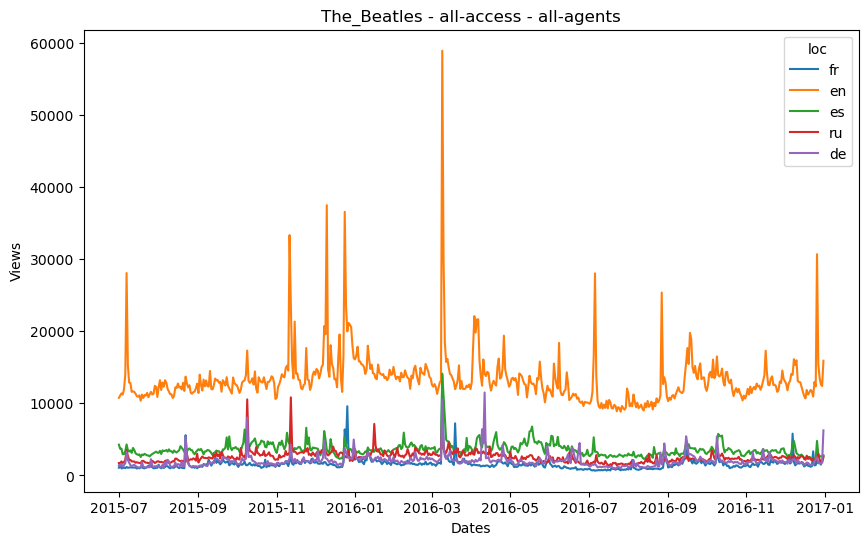

In [16]:
plot_names("The_Beatles", "all-access", "all-agents")

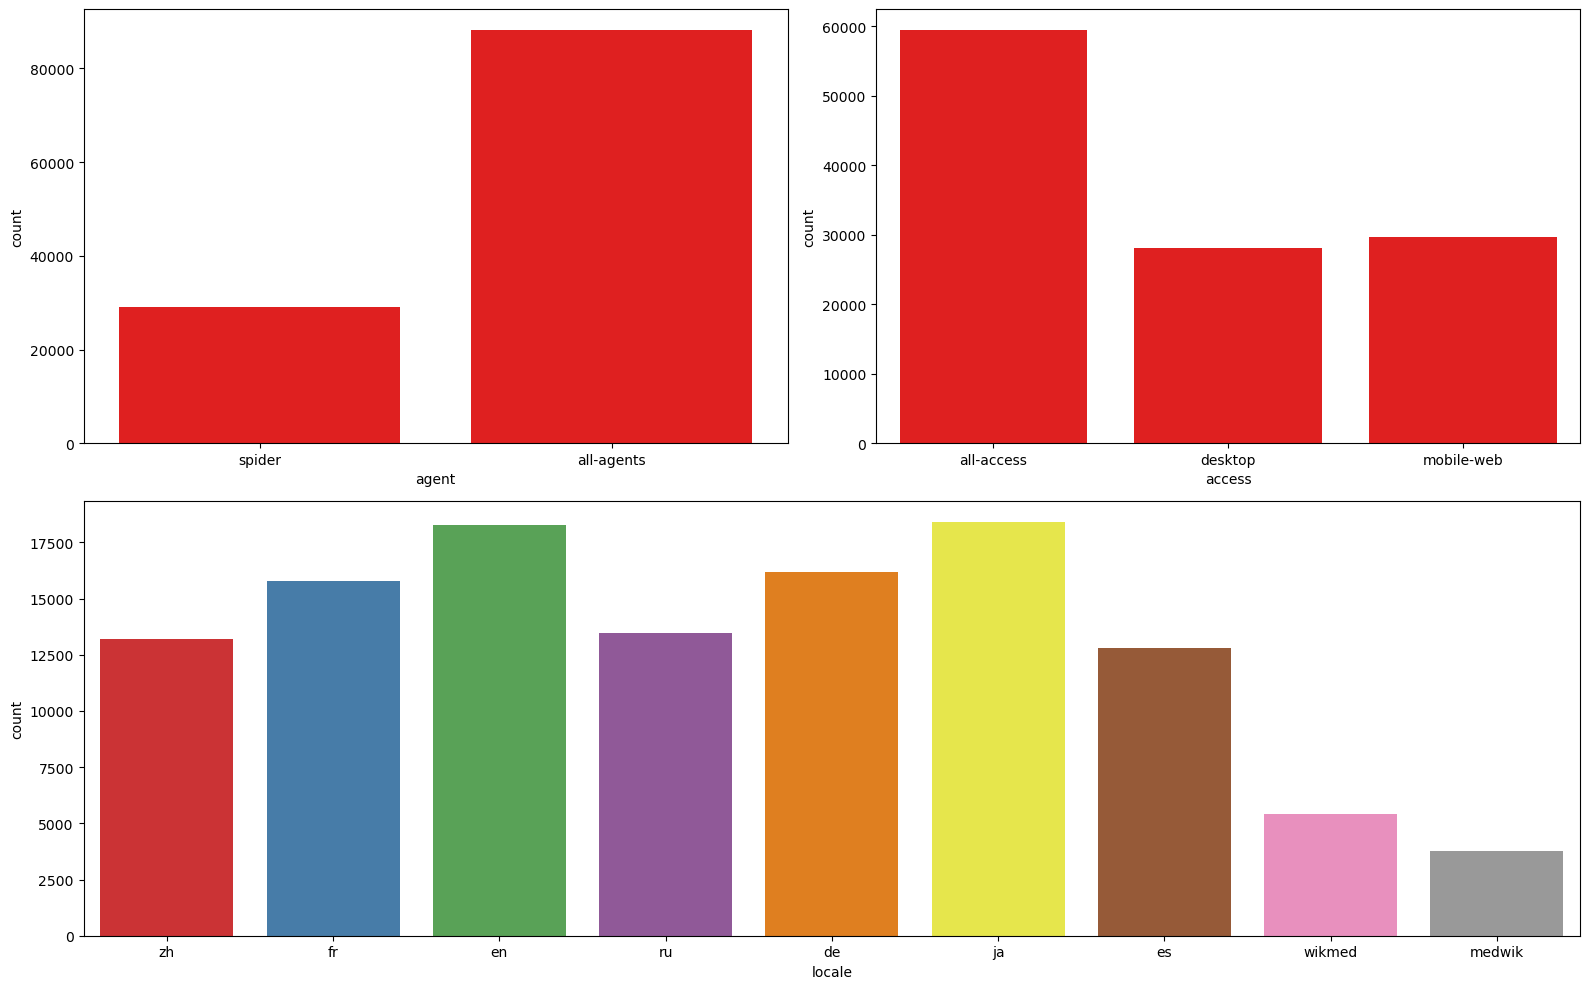

In [17]:
# p1 = sns.countplot(data=pages, x='agent', color='red')
# plt.figure()

# p2 = sns.countplot(data=pages, x='access', color='red')
# plt.figure()

# p3 = sns.countplot(data=pages, x='locale', palette='Set1')
# plt.figure()

fig, axs = plt.subplots(2, 2, figsize=(16, 10),
                        gridspec_kw={'height_ratios': [1, 1],
                                     'width_ratios': [1, 1]})

# fig, axs = plt.subplots(1, 2, figsize=(16, 10))

sns.countplot(data=pages, x='agent', color='red', ax=axs[0, 0])
sns.countplot(data=pages, x='access', color='red', ax=axs[0, 1])

fig.delaxes(axs[1, 0])
fig.delaxes(axs[1, 1])
ax_bottom = fig.add_subplot(212)
sns.countplot(data=pages, x='locale', palette='Set1', ax=ax_bottom)

plt.tight_layout()
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

def params_ts1(rownr):
    
    df = dates.reset_index().rename(columns={'index': 'rowname'})
    df_filtered = df[df['rowname'] == rownr].transpose().iloc[1:]
    df_filtered.columns = ['views']
    df_filtered = df_filtered.reset_index()
    df_filtered['dates'] = pd.to_datetime(df_filtered['index'])
    df_filtered.drop(['index'], axis = 1, inplace = True)
    
    df_filtered['dates'] = pd.to_datetime(df_filtered['dates'])
    df_filtered['views'] = df_filtered['views'].astype('Int64')
    
    if df_filtered['views'].isna().mean() == 1:
        slope = 0
        slope_err = 0
    else:
        X = (df_filtered['dates'] - df_filtered['dates'].min()).dt.days.values.reshape(-1, 1)
        y = df_filtered['views'].values
        model = LinearRegression().fit(X, y)
        slope = model.coef_[0]
        slope_err = np.std(y - model.predict(X))

    bar = pd.DataFrame({
        'rowname': [rownr],
        'min_view': [df_filtered['views'].min()],
        'max_view': [df_filtered['views'].max()],
        'mean_view': [df_filtered['views'].mean()],
        'med_view': [df_filtered['views'].median()],
        'sd_view': [df_filtered['views'].std()],
        'slope': [slope / slope_err if slope_err != 0 else 0]
    })

    return bar

In [19]:
import random

random.seed(4321)
foo = pages.sample(n=2000)
rows = foo['index'].values
pcols = ['index', 'min_view', 'max_view', 'mean_view', 'med_view', 'sd_view', 'slope']
params_ts1(rows[0])

params = params_ts1(rows[0])
for i in range(1, len(rows)):
    params = pd.concat([params, params_ts1(rows[i])], ignore_index=True)

# Filter and mutate the params DataFrame
params = params[~params['mean_view'].isna()]
params['rowname'] = params['rowname'].astype(str)

print(params)

     rowname  min_view  max_view    mean_view  med_view      sd_view     slope
0     140361       885     24124  2343.736364    2061.0  1475.645270  0.000087
1      85541       261      2446   668.809091     566.5   321.708301 -0.000288
2     135498         0      3435    75.332727      17.0   275.233539  0.001132
3      99195       495      4835  1407.390909    1213.5   635.955634 -0.003270
4     115652       164     18494   376.627273     296.5   799.929715  0.000787
...      ...       ...       ...          ...       ...          ...       ...
1995   60729       494      3794   948.007273     861.5   369.774189 -0.001835
1996  100253      1123      5873  2385.169091    2296.5   472.899719 -0.000872
1997   30311       274      7609  1088.120000     771.5   918.865030 -0.000849
1998   13452         0        14     2.365455       2.0     1.869876  0.001331
1999   24154        14      3169   747.758182     963.5   735.580490  0.003743

[2000 rows x 7 columns]


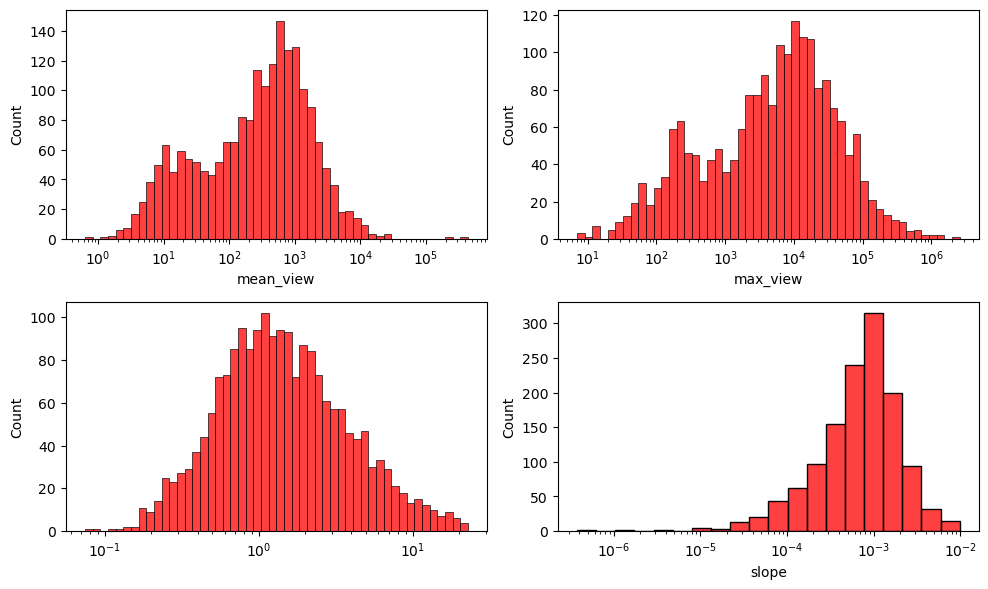

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

sns.histplot(params['mean_view'], bins = 50, color = 'red', log_scale=True, ax = axs[0,0])
sns.histplot(params['max_view'], bins = 50, color = 'red', log_scale=True, ax = axs[0,1])
sns.histplot(params['sd_view']/params['mean_view'], bins = 50, color = 'red', log_scale=True, ax = axs[1,0])
# sns.histplot(params['slope'], bins = 30, color = 'red', ax = axs[1,1])
sns.histplot(params['slope'], bins=20, color = 'red', log_scale=True, ax = axs[1,1])

plt.tight_layout()
plt.show()

In [21]:
pages_dup = pages.copy()
pages_dup.rename(columns = {'index': 'rowname'}, inplace = True)
params['rowname'] = params['rowname'].astype('int64')
par_page = pd.merge(params, pages_dup, on='rowname')
par_page.head()


# params.info()
# pages.info()

,rowname,min_view,max_view,mean_view,med_view,sd_view,slope,article,locale,access,agent
0,140361,885,24124,2343.736364,2061.0,1475.645270,0.000087,Borussia_Dortmund_,de,all-access,all-agents
1,85541,261,2446,668.809091,566.5,321.708301,-0.000288,マクロスF_,ja,desktop,all-agents
2,135498,0,3435,75.332727,17.0,275.233539,0.001132,ATPワールドツアー・ファイナル_,ja,all-access,spider
3,99195,495,4835,1407.390909,1213.5,635.955634,-0.003270,Кости_(телесериал)_,ru,all-access,all-agents
4,115652,164,18494,376.627273,296.5,799.929715,0.000787,Queen_(Band)_,de,mobile-web,all-agents


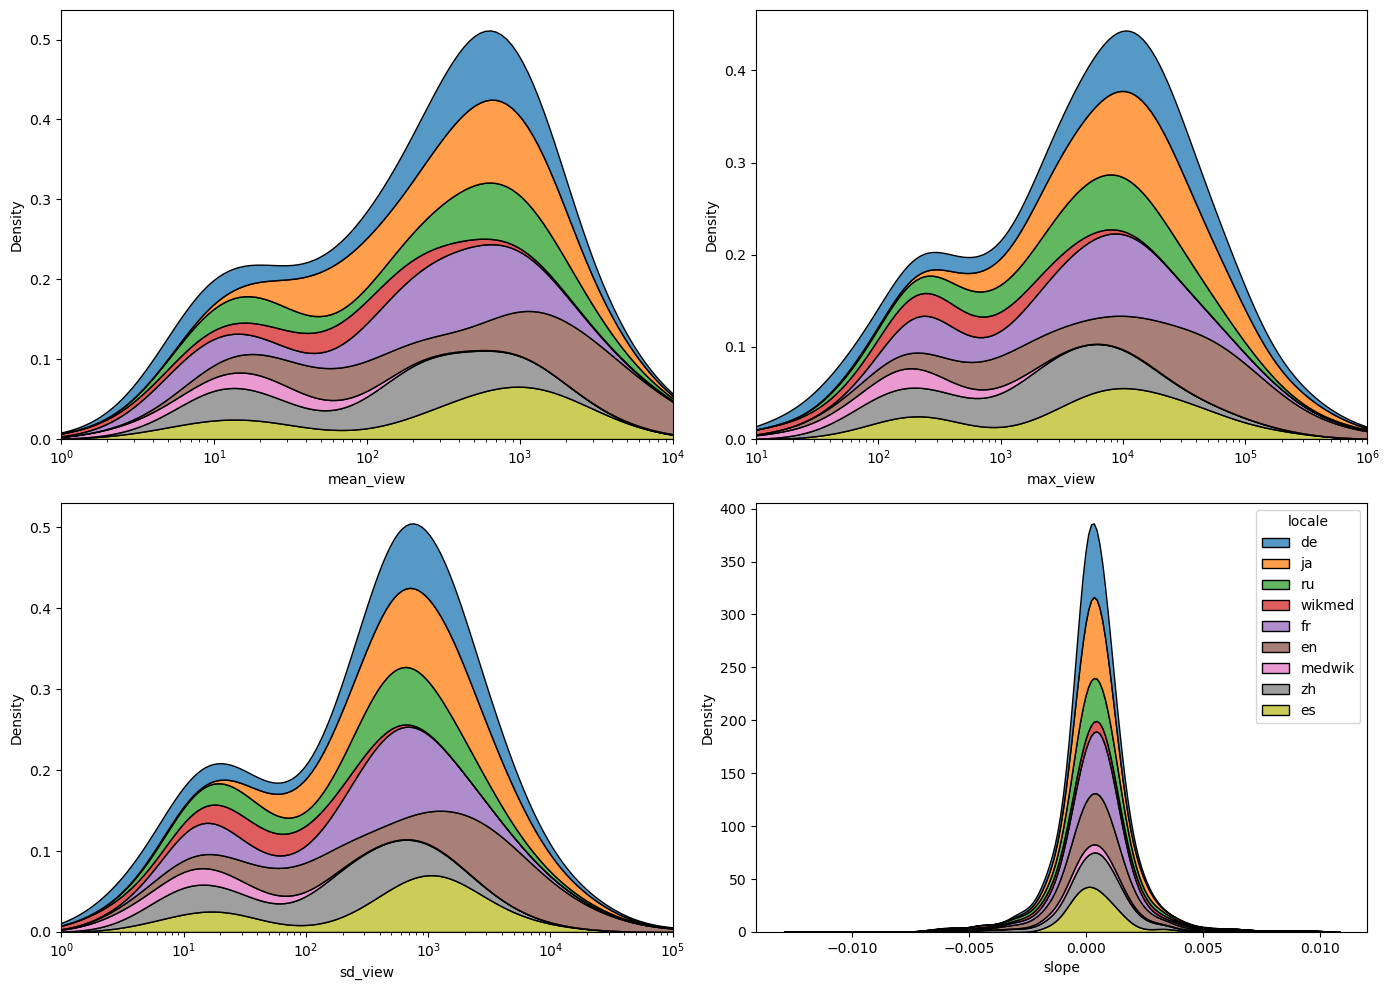

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1
sns.kdeplot(data=par_page, x='mean_view', hue='locale', fill=True, ax=axs[0, 0], 
            log_scale = True, common_norm=True, multiple="stack")
axs[0, 0].set_xlim(1, 1e4)
axs[0, 0].legend().set_visible(False)

sns.kdeplot(data=par_page, x='max_view', hue='locale', fill=True, ax=axs[0, 1], 
            log_scale = True, common_norm=True, multiple="stack")
axs[0, 1].set_xlim(10, 1e6)
axs[0, 1].legend().set_visible(False)

# Plot 3
sns.kdeplot(data=par_page, x='sd_view', hue='locale', fill=True, ax=axs[1, 0], 
            log_scale = True, common_norm=True, multiple="stack")
axs[1, 0].set_xlim(1, 1e5)
axs[1, 0].legend().set_visible(False)

# Plot 4
sns.kdeplot(data=par_page, x='slope', hue='locale', fill=True, ax=axs[1, 1], 
            common_norm=True, multiple="stack")
# axs[1, 1].set_xlim(-10, 10)
# axs[1, 1].legend().set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

In [23]:
params_sorted = params.sort_values(by='slope', ascending=False).head(5)

params_sorted

,rowname,min_view,max_view,mean_view,med_view,sd_view,slope
1441,40184,32,29458,7421.578182,103.5,8298.587839,0.009836
1214,45048,13,193,74.345455,76.0,32.432313,0.009620
1334,12339,2479,83726,26148.510909,6457.0,28093.629683,0.009430
1062,75378,137,15647,2608.116364,663.5,2601.115732,0.009233
68,7344,169070,788456,435616.385455,360490.0,147265.783900,0.008231


[40184, 45048, 12339, 75378]


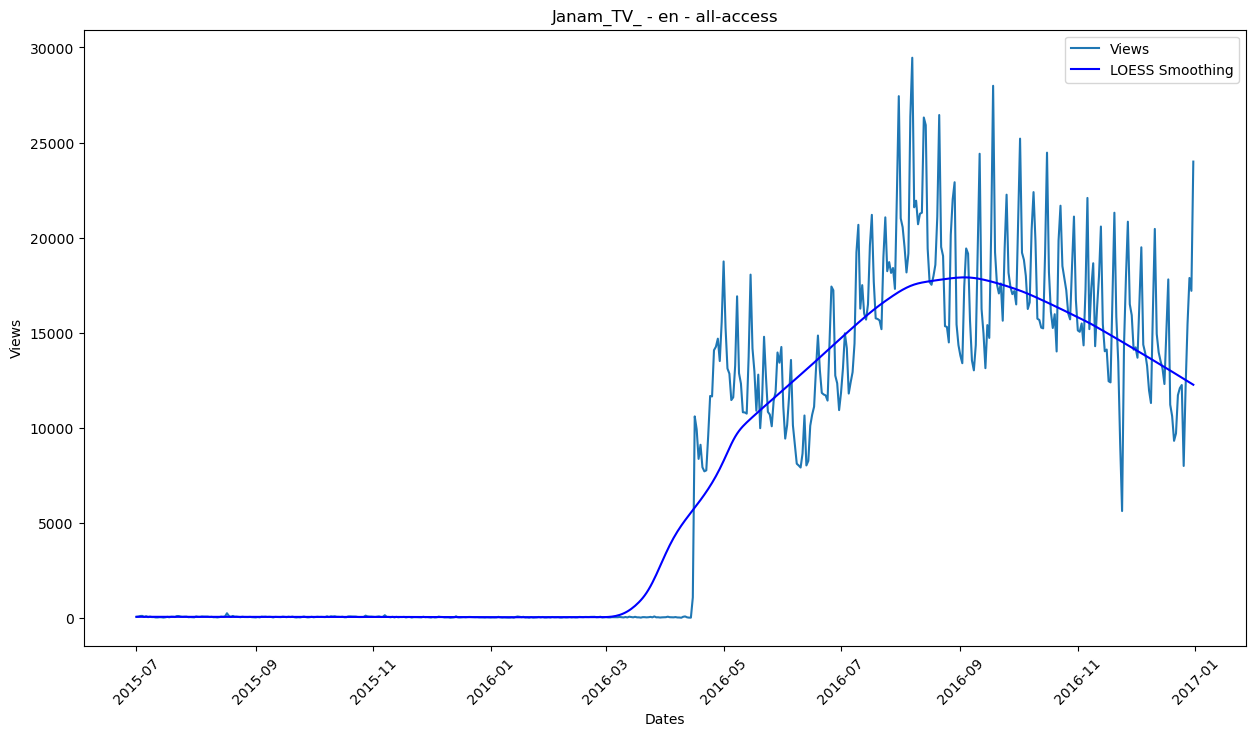

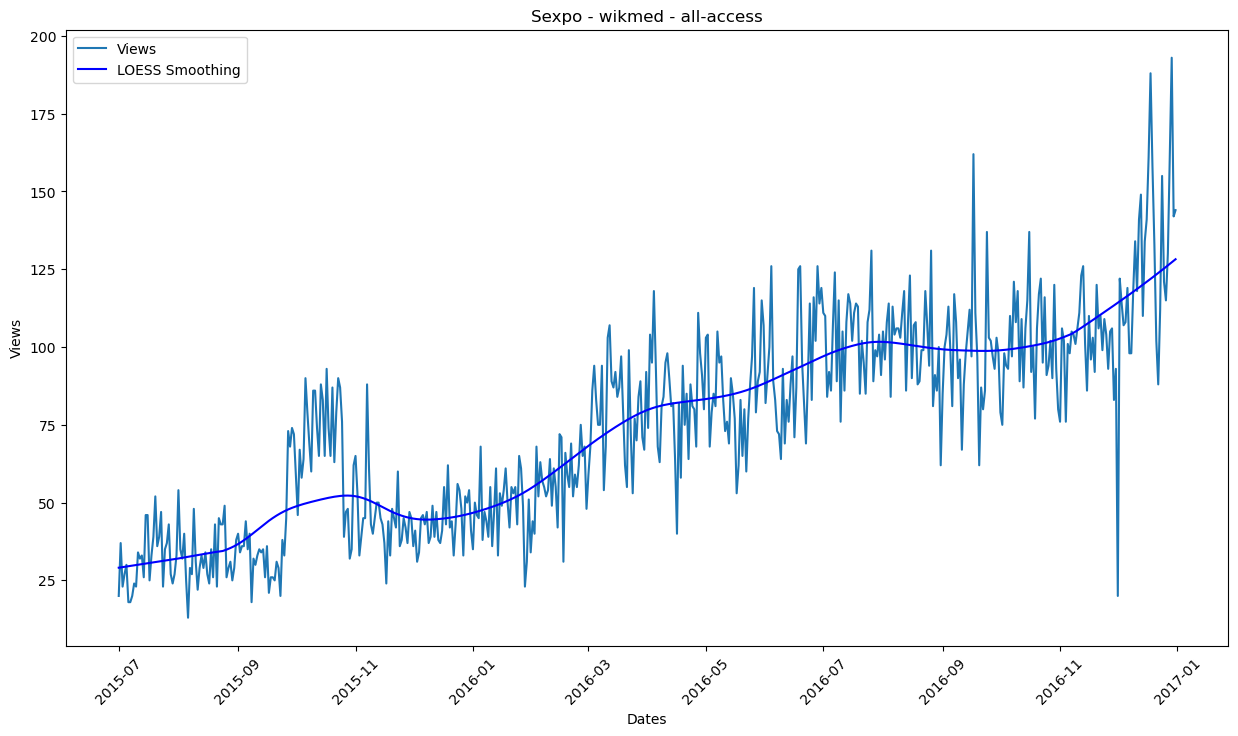

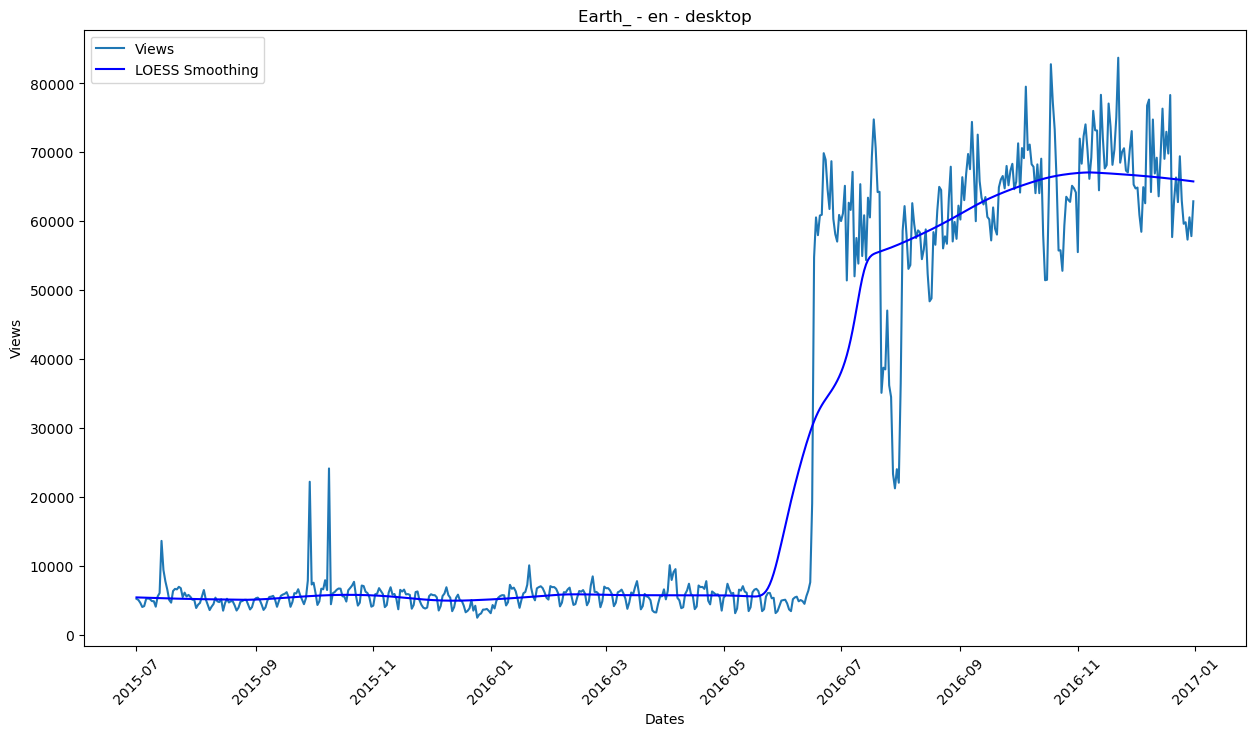

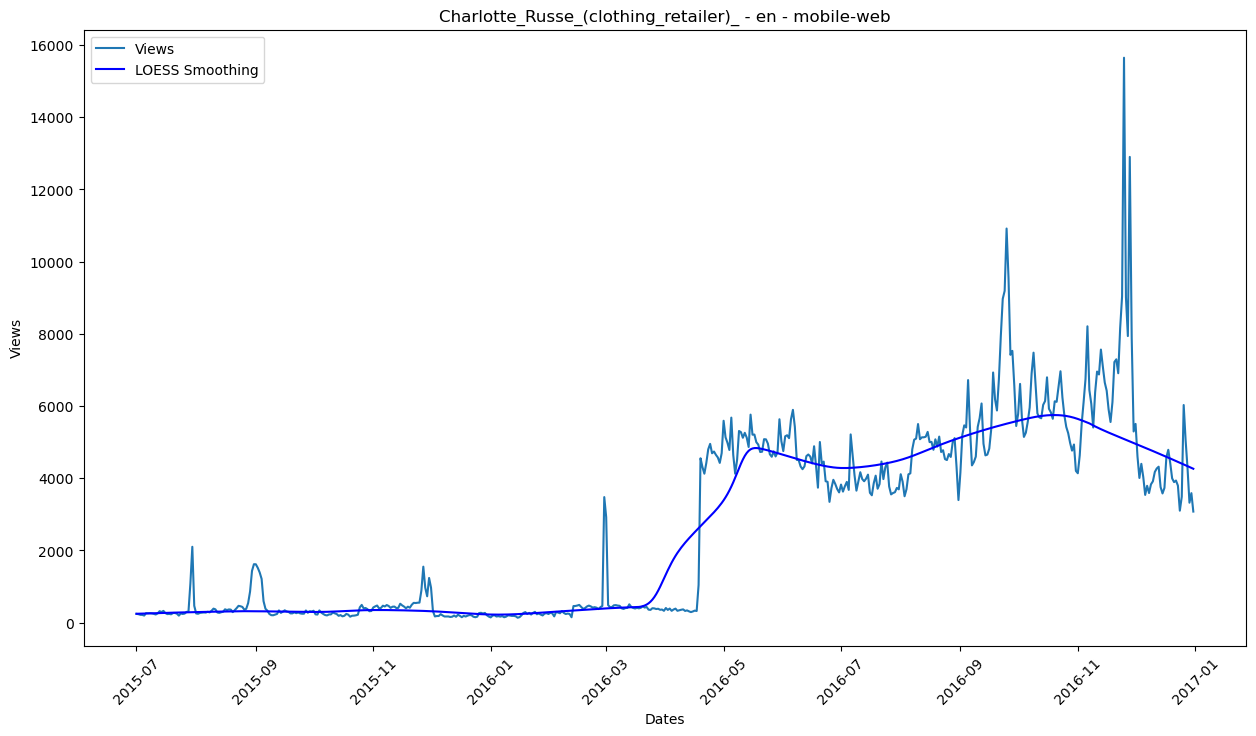

In [24]:
ids = list(params_sorted.head(4)['rowname'])
print(ids)

for row in ids:
    plot_rownr(row)

[37230, 7426, 43497, 121965]


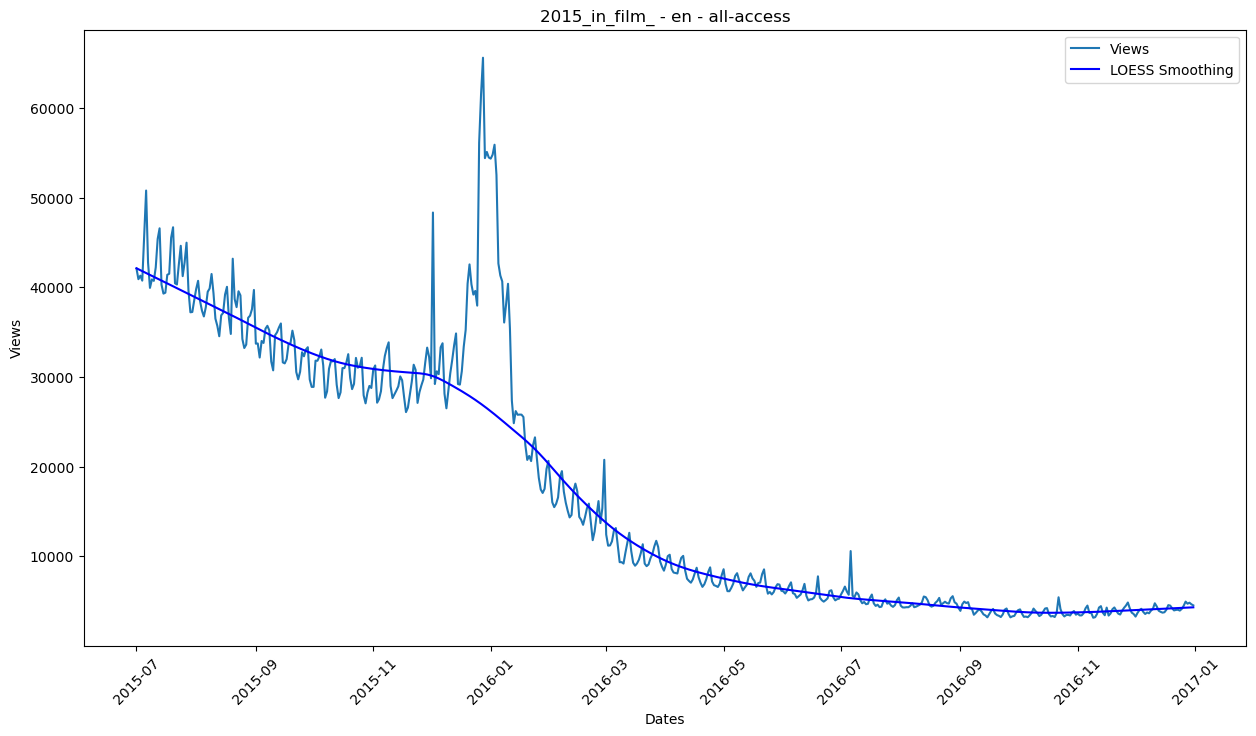

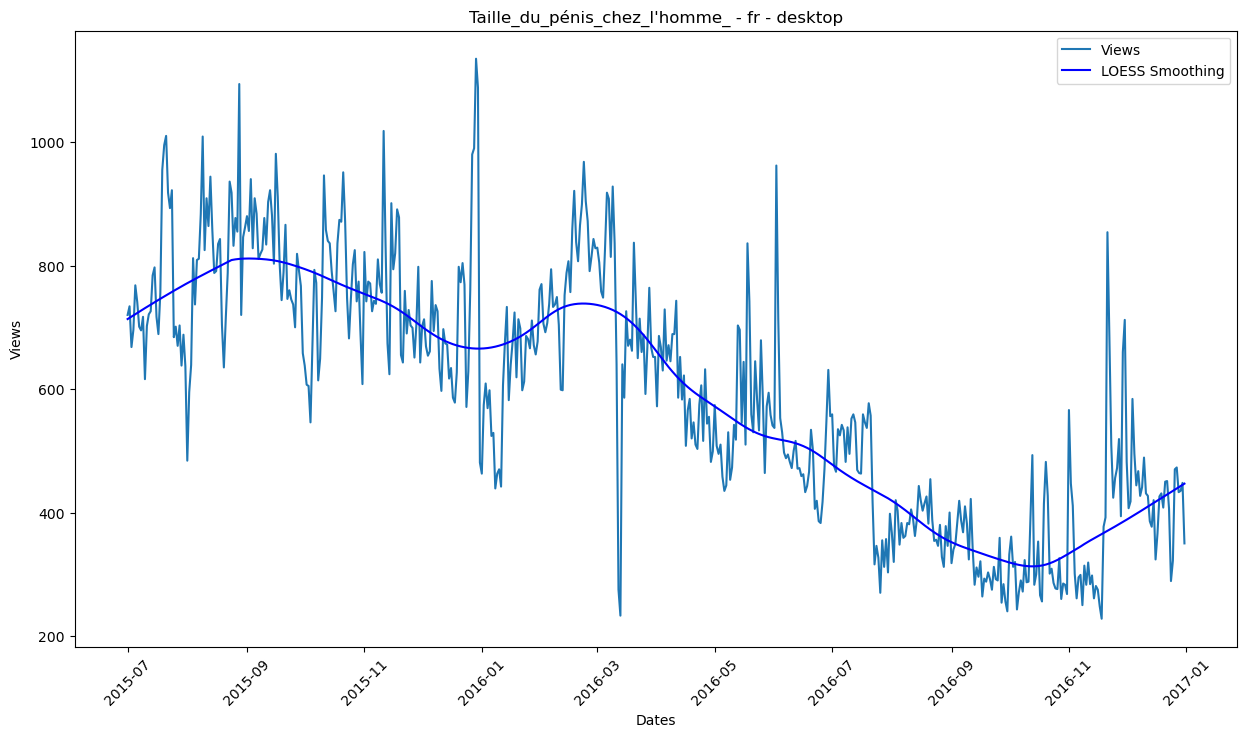

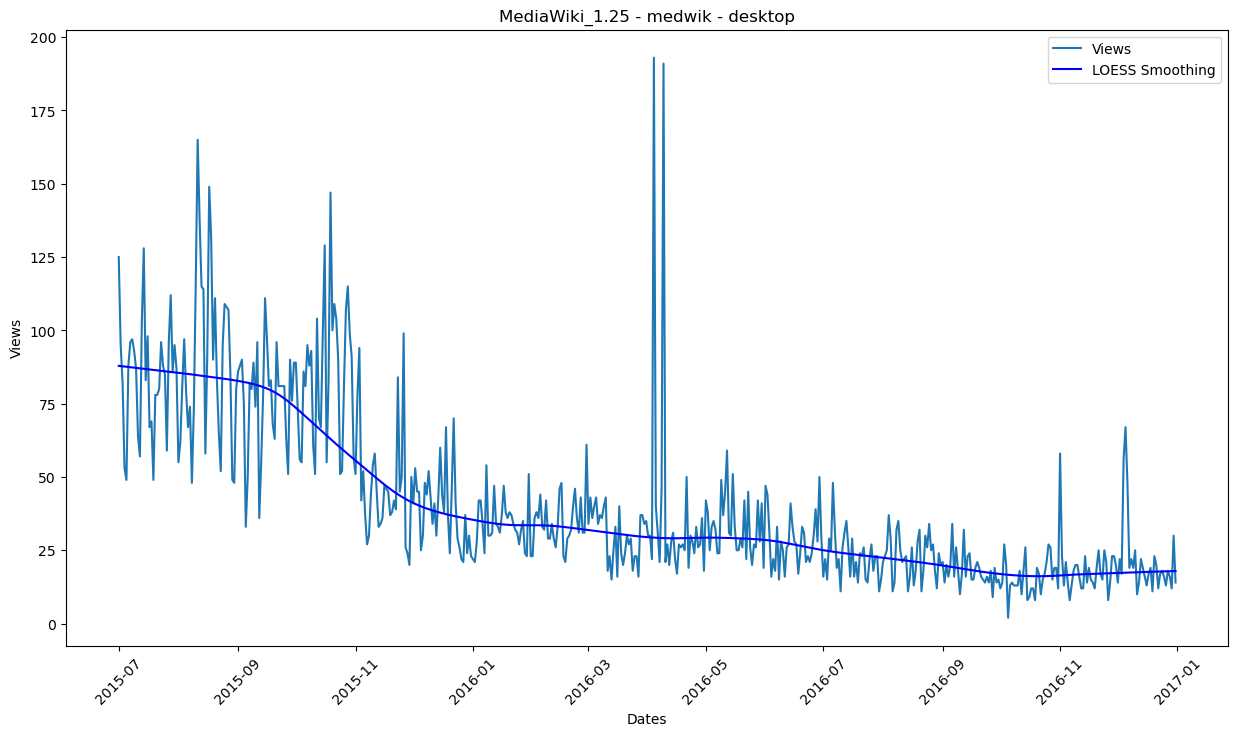

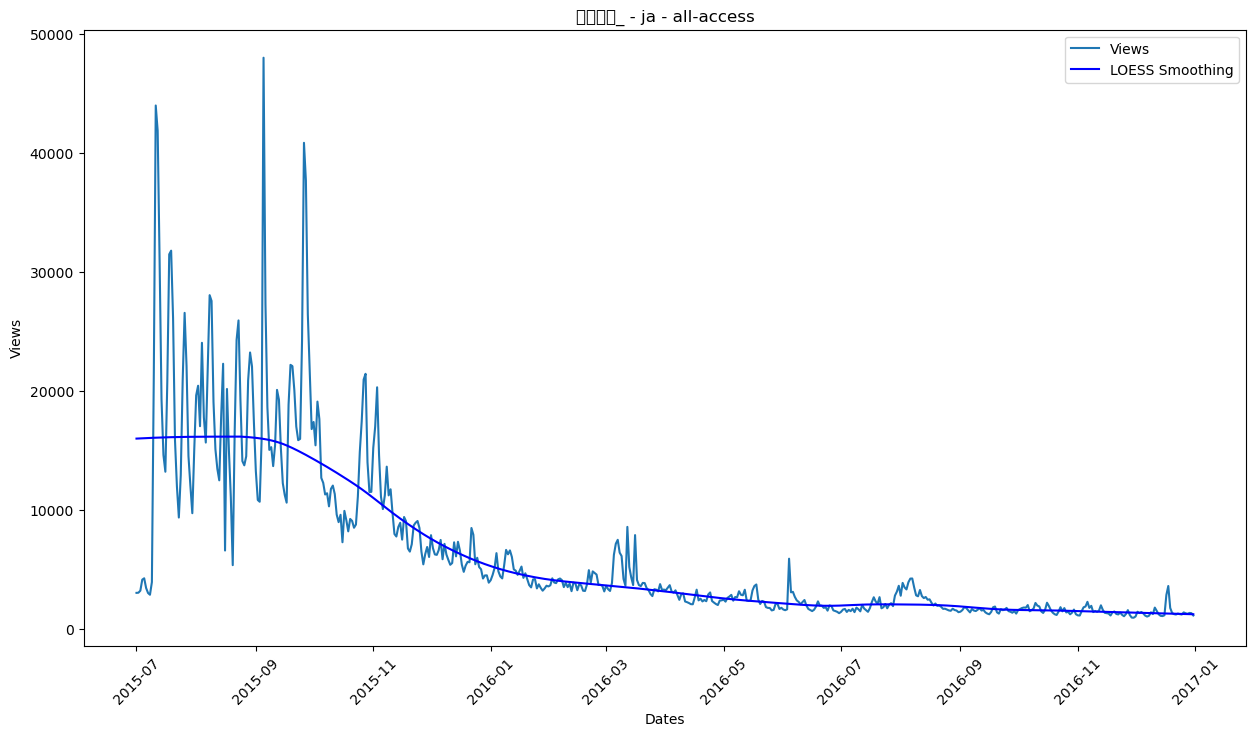

In [25]:
params_sorted = params.sort_values(by='slope').head(5)

ids = list(params_sorted.head(4)['rowname'])
print(ids)

for row in ids:
    plot_rownr(row)

[7344, 42011, 10399, 39991]


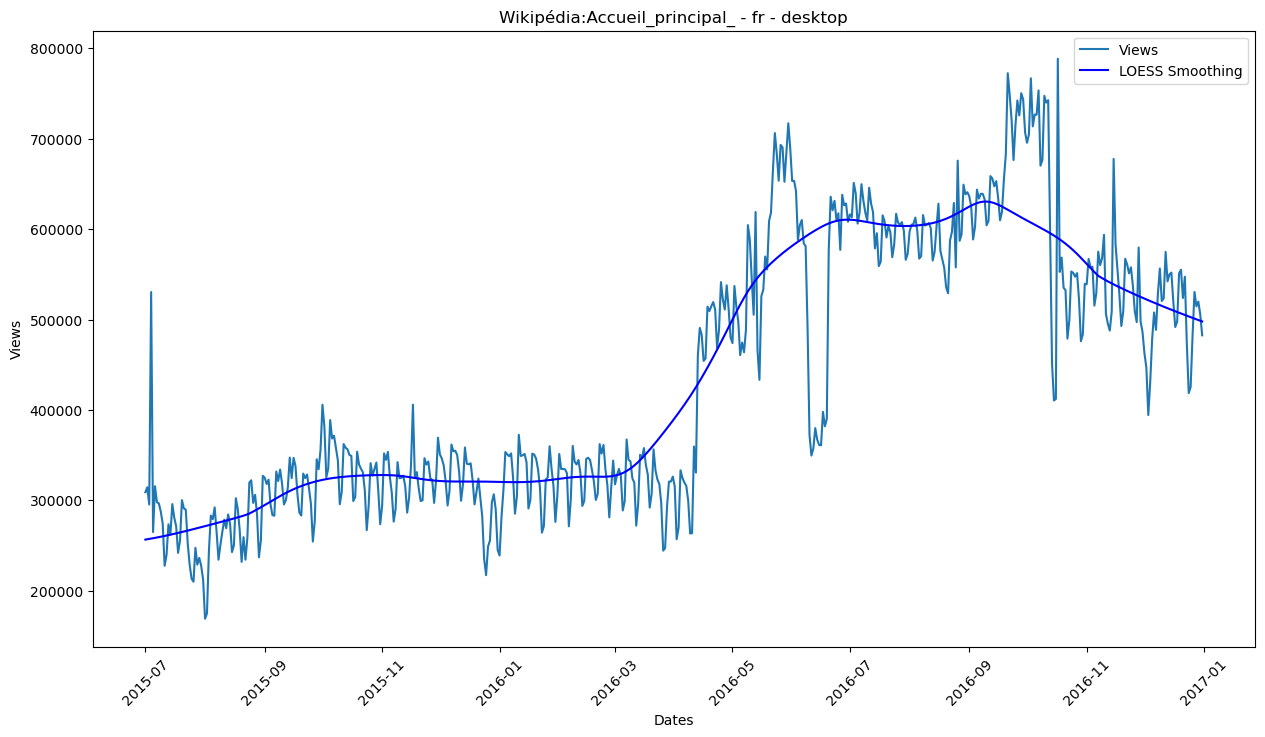

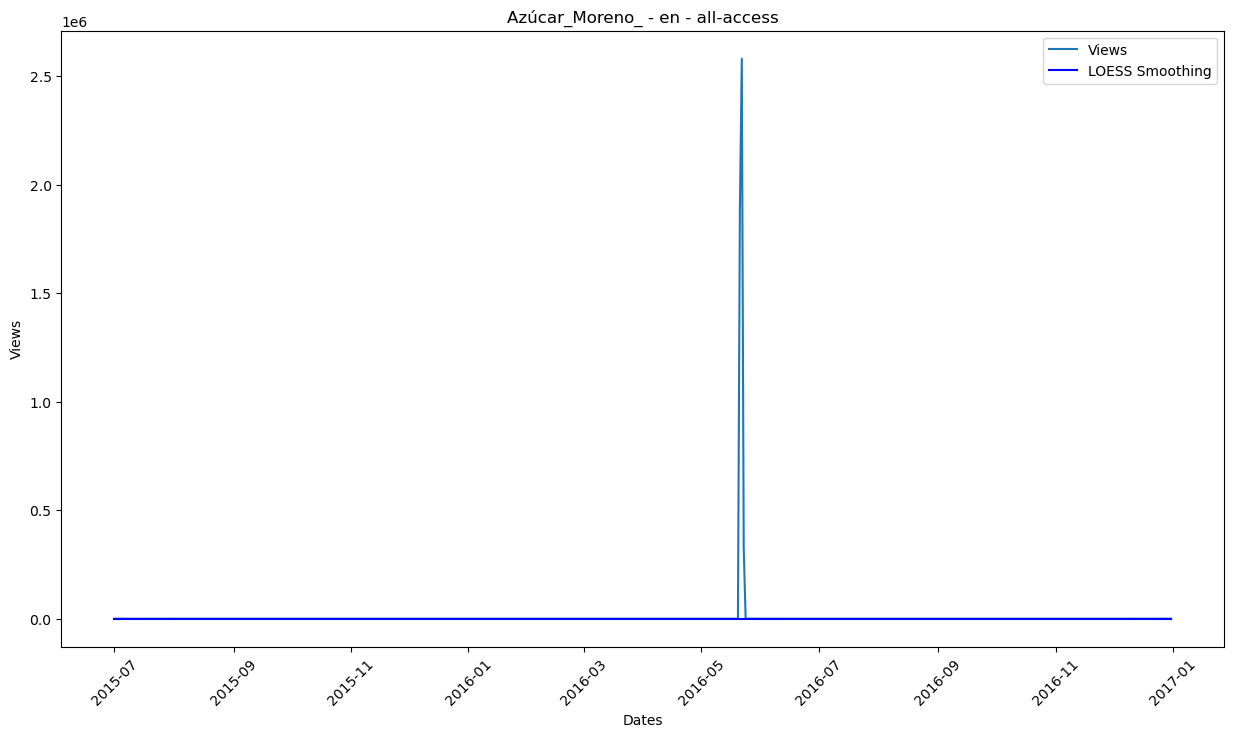

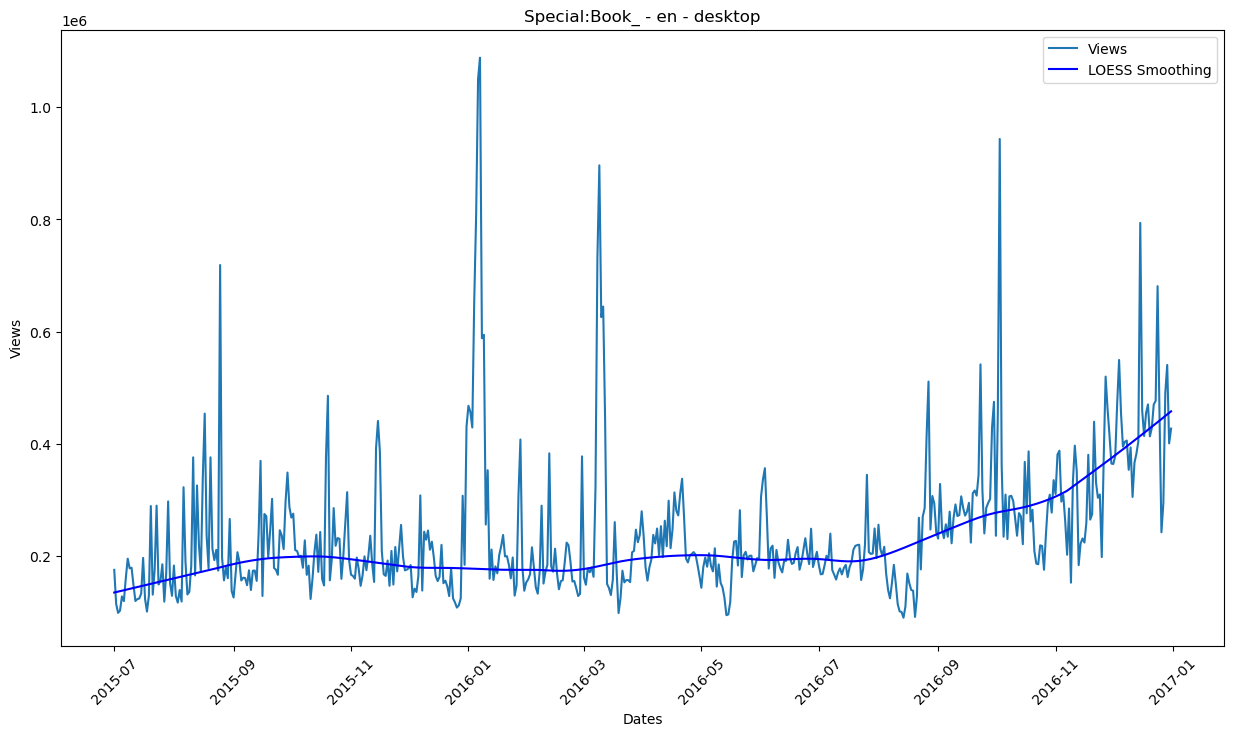

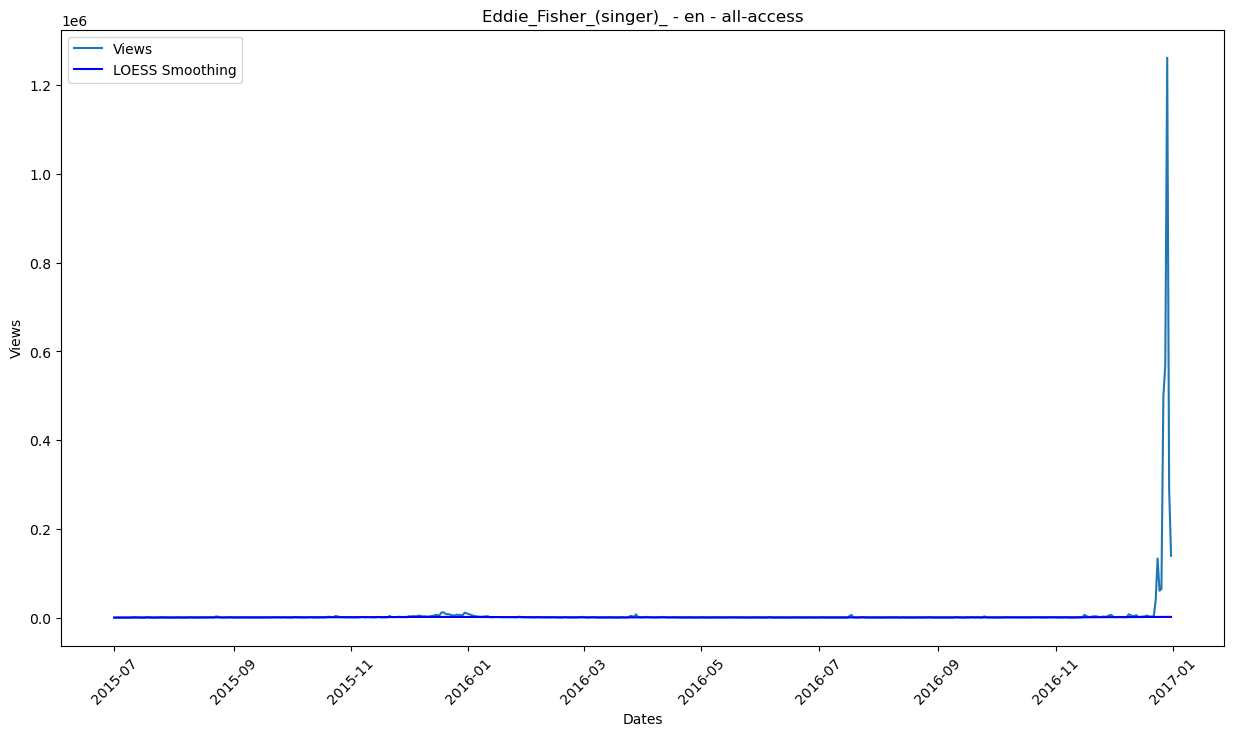

In [26]:
variate_top_4 = params.sort_values(by='sd_view', ascending=False).head(5)

ids = list(variate_top_4.head(4)['rowname'])
print(ids)

for row in ids:
    plot_rownr(row)

[114535, 6873, 38869, 7642]


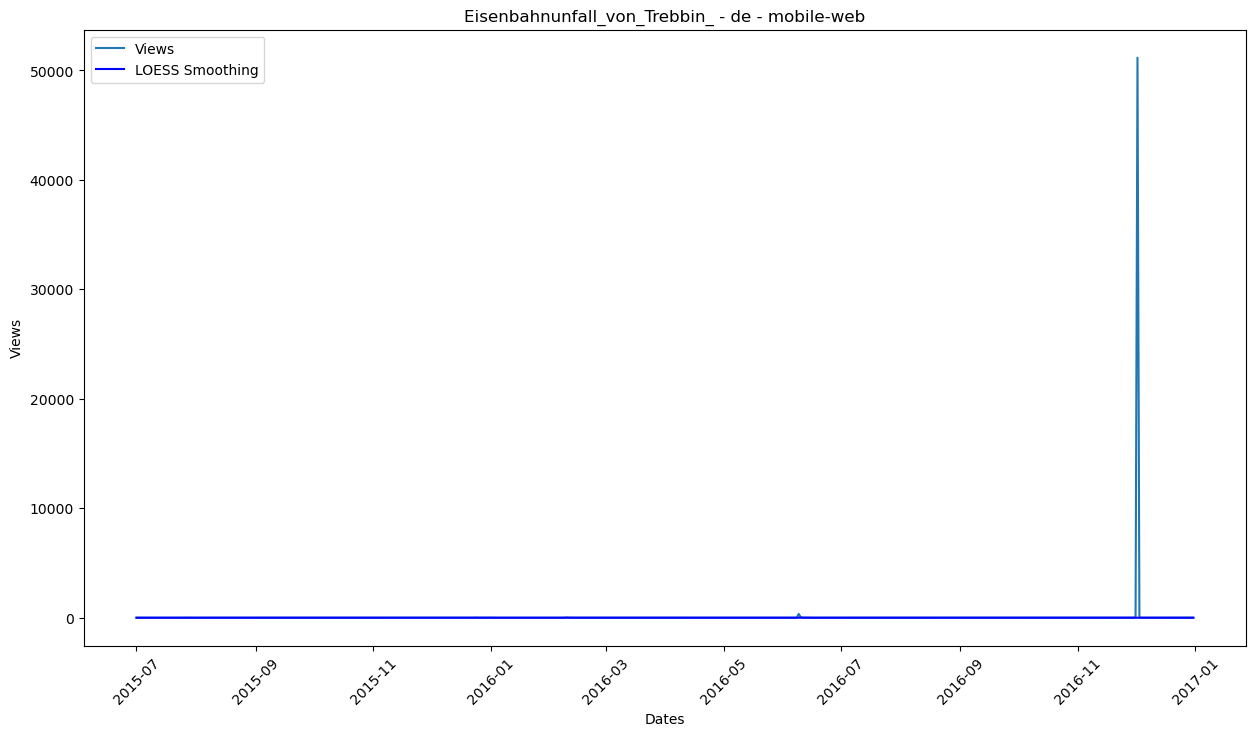

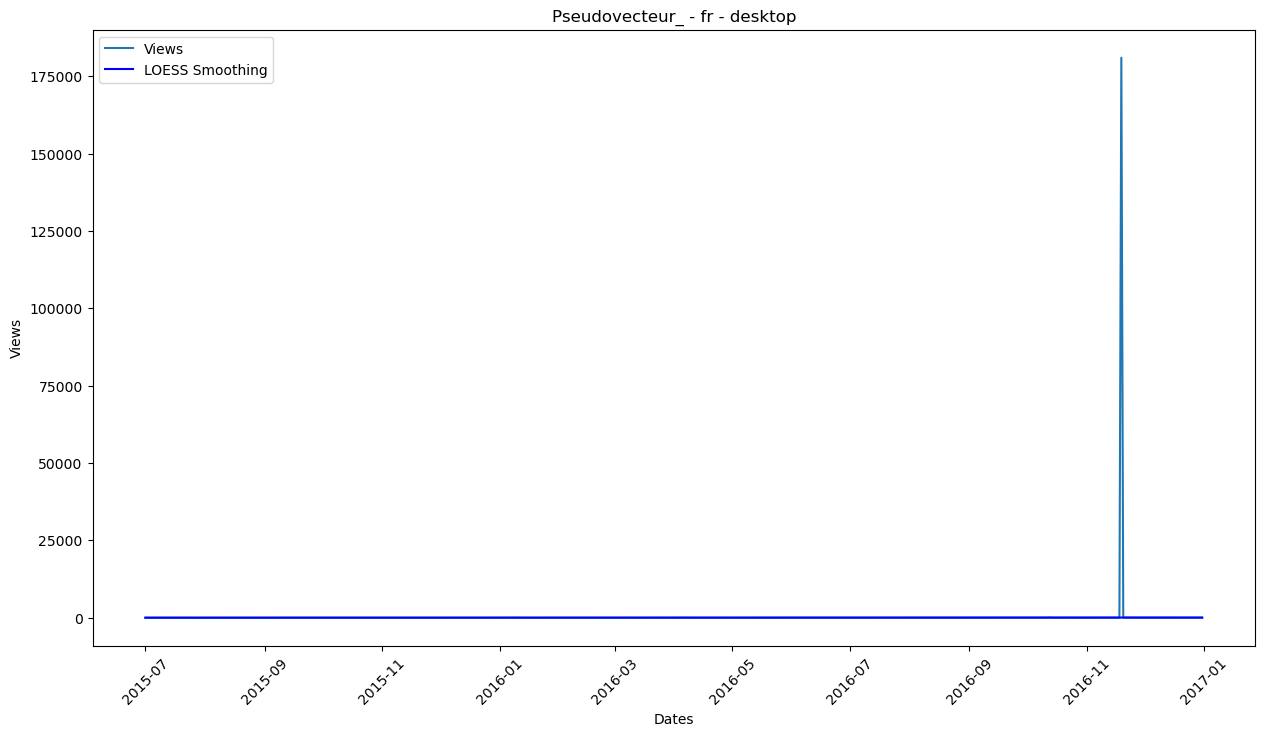

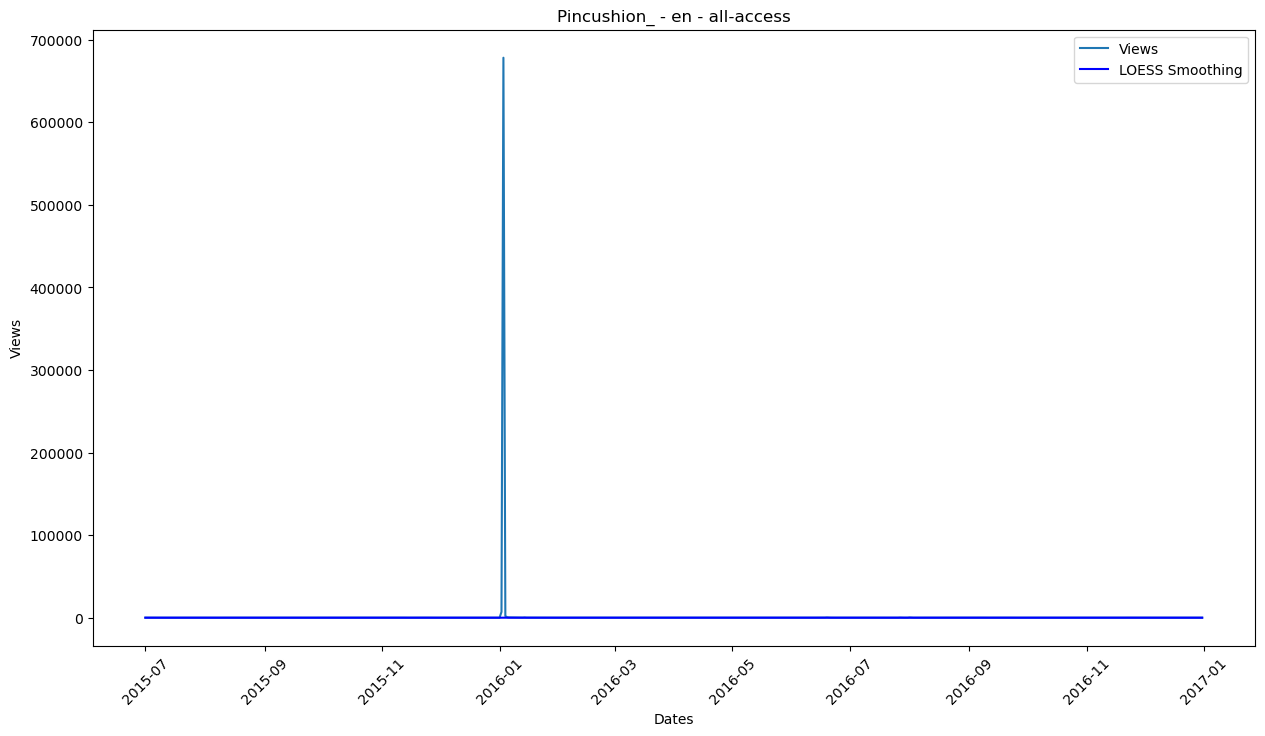

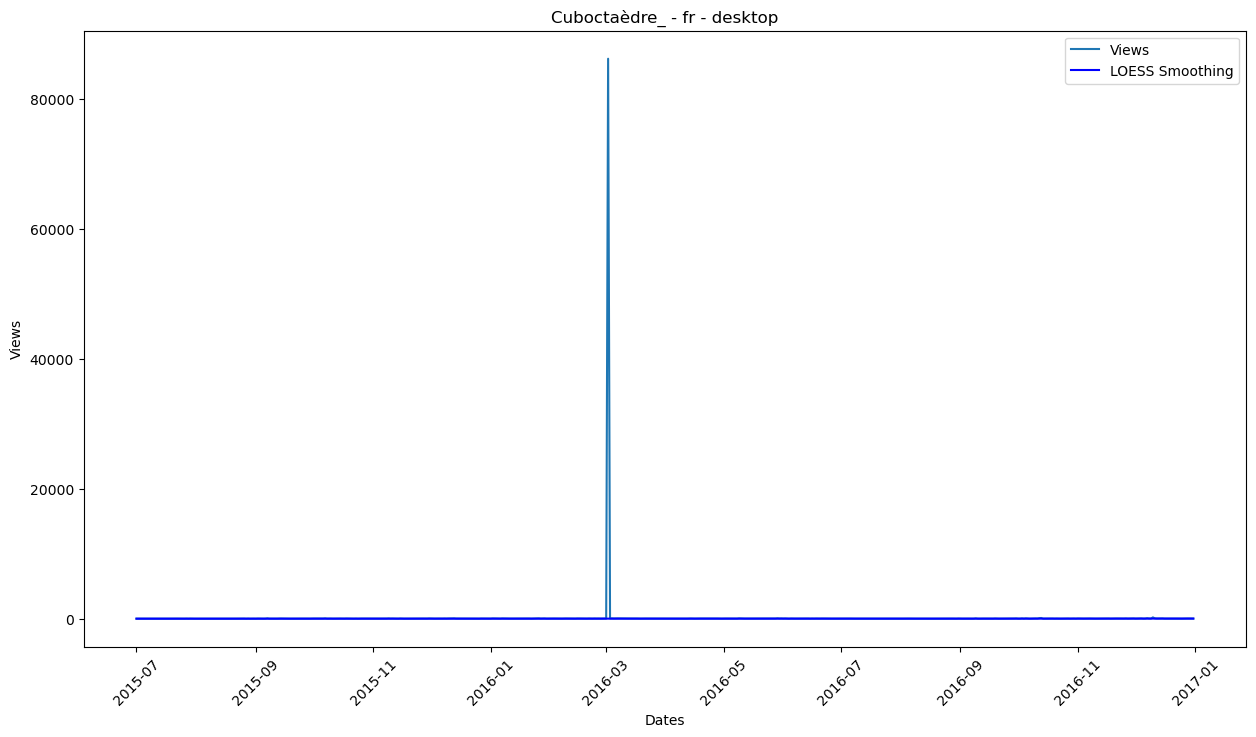

In [27]:
variate_top_4 = params.assign(ratio=lambda x: x['sd_view'] / x['mean_view'])\
.sort_values(by='ratio', ascending=False)\
.head(5)

ids = list(variate_top_4.head(4)['rowname'])
print(ids)

for row in ids:
    plot_rownr(row)

In [28]:
params.assign(diff=lambda x: x['max_view'] - x['mean_view'])\
.sort_values(by='diff', ascending=False)\
.head(5)

,rowname,min_view,max_view,mean_view,med_view,sd_view,slope,diff
1640,42011,26,2581285,8763.892727,57.0,136667.185425,0.000129,2.572521e+06
861,118323,89,1285514,3194.905455,206.5,55318.888374,-0.000237,1.282319e+06
593,39991,594,1260960,7432.289091,1292.5,64261.490006,0.000939,1.253528e+06
374,11463,445,1036623,8798.209091,3873.5,49617.694302,-0.000461,1.027825e+06
958,10399,89492,1088563,242338.014545,202568.0,126779.143368,0.002035,8.462250e+05


[7344, 10399, 12339, 38514]


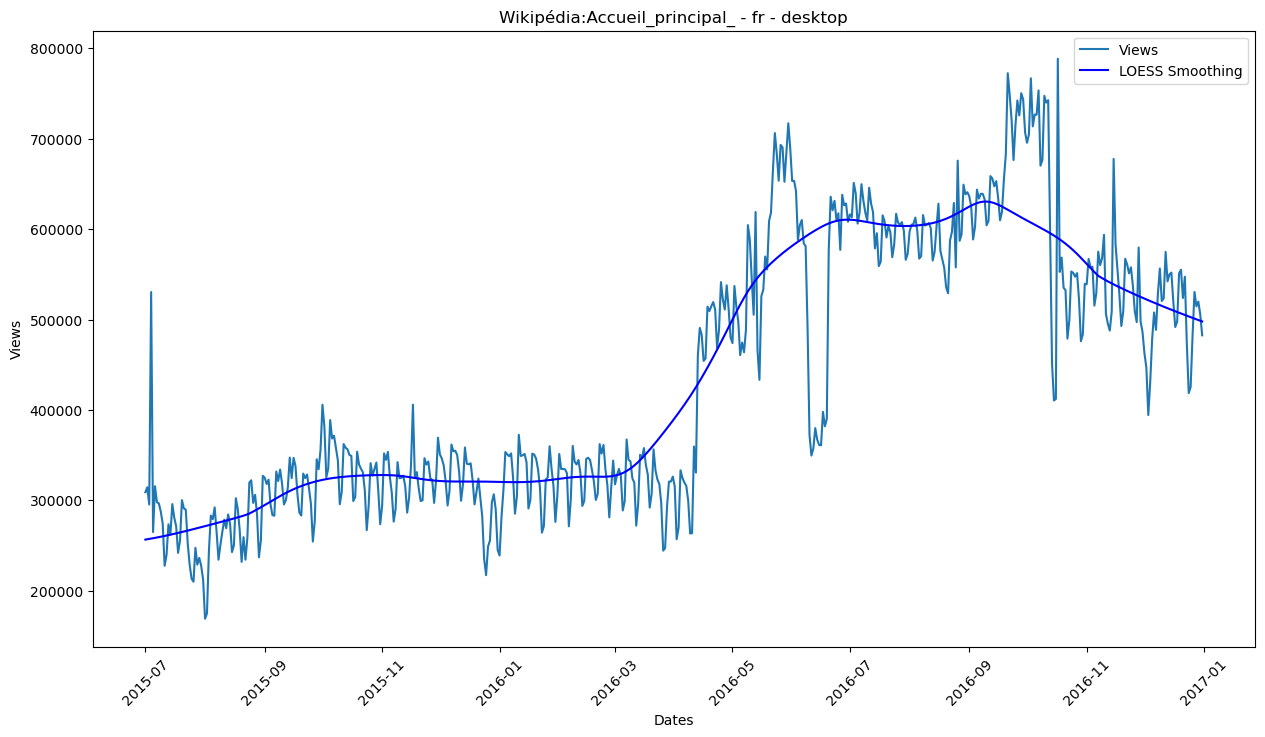

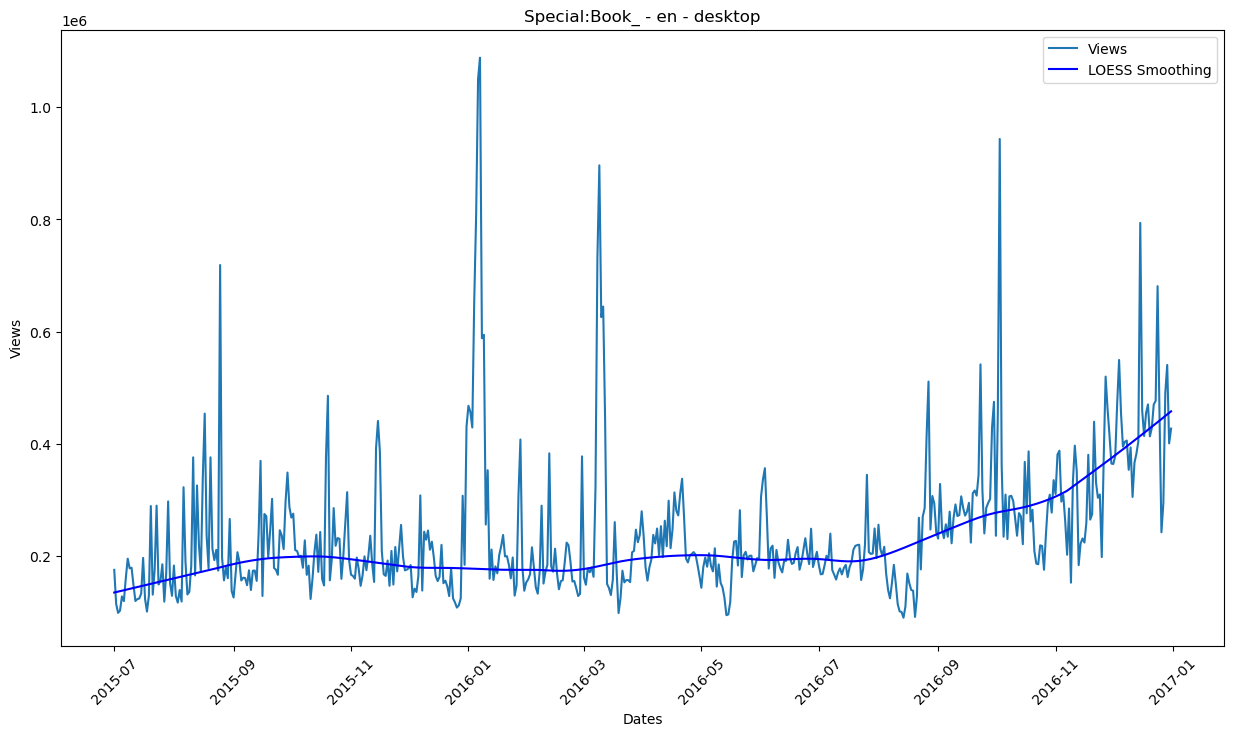

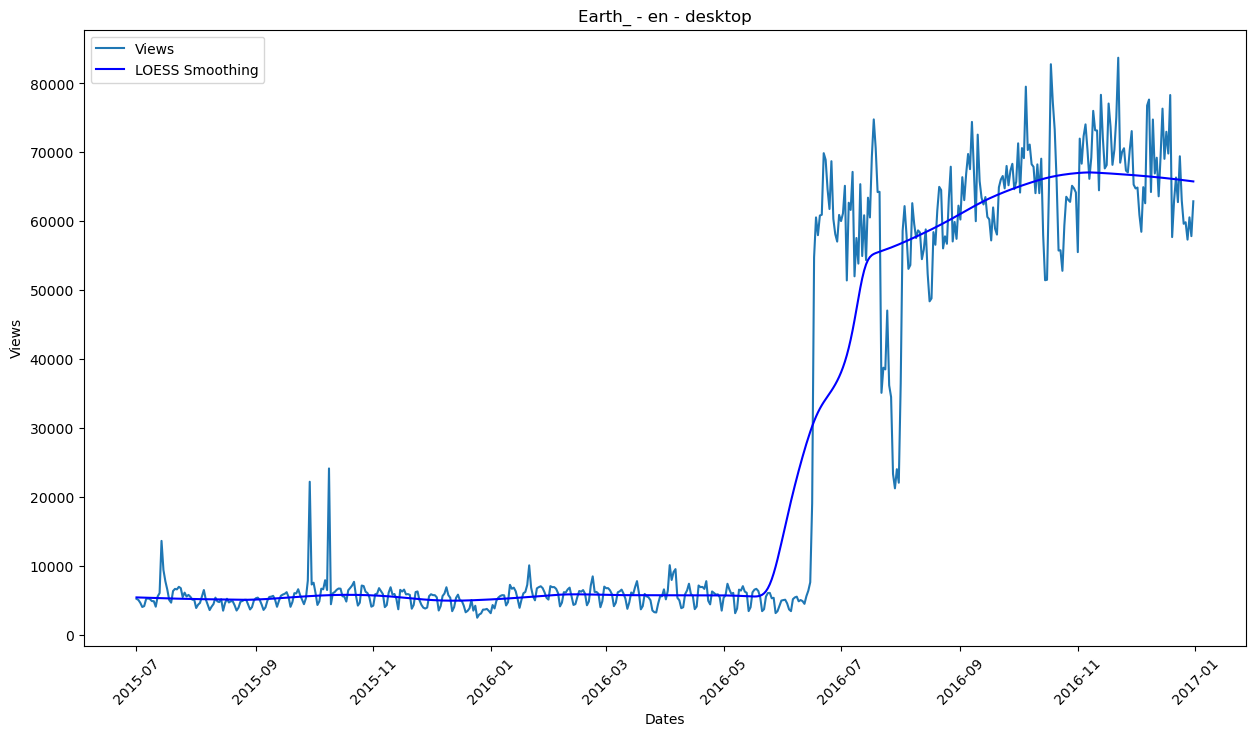

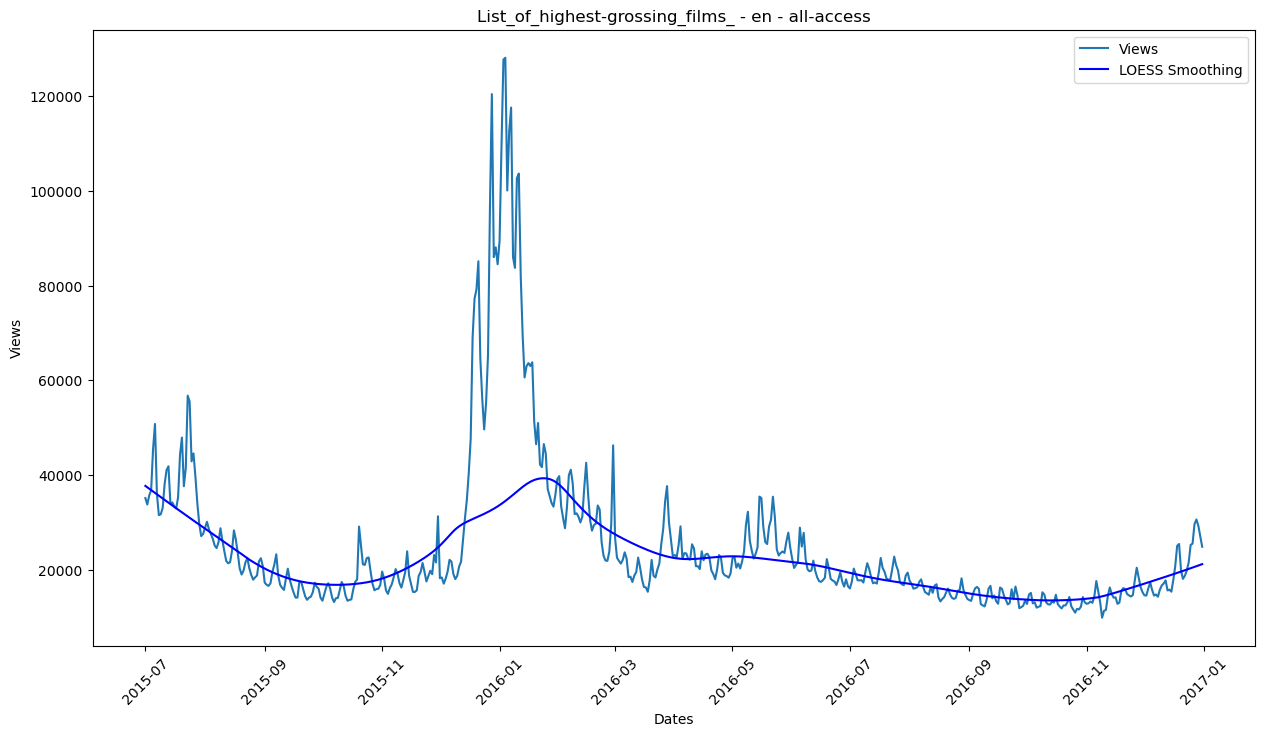

In [29]:
mean_top_4 = params.sort_values(by='mean_view', ascending=False).head(5)

ids = list(mean_top_4.head(4)['rowname'])
print(ids)

for row in ids:
    plot_rownr(row)

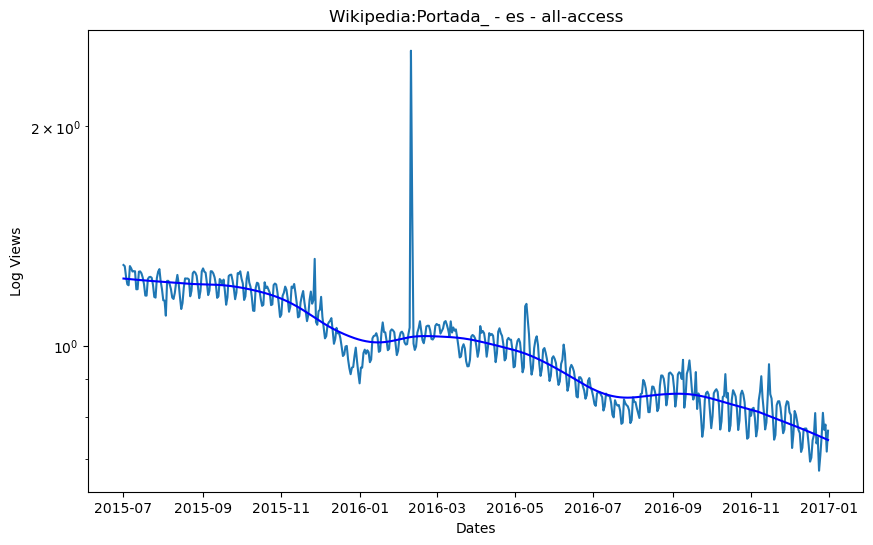

In [30]:
plot_rownr_log(92205)

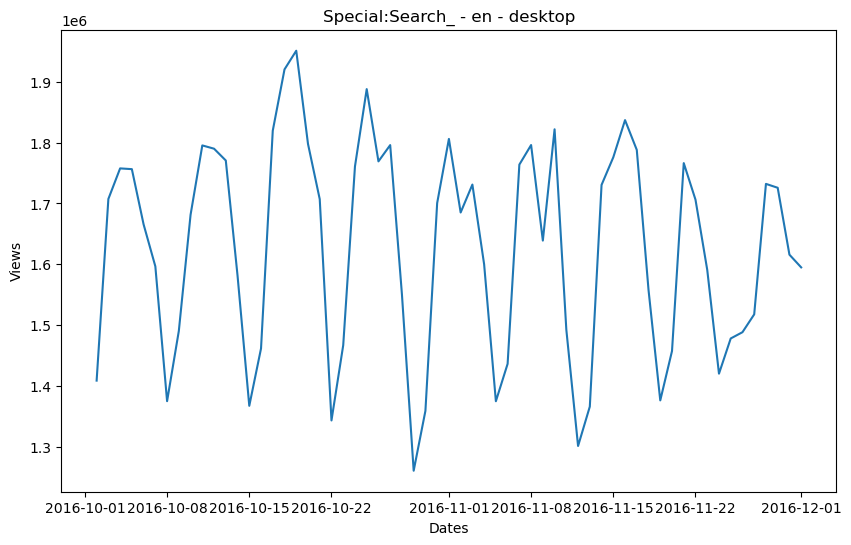

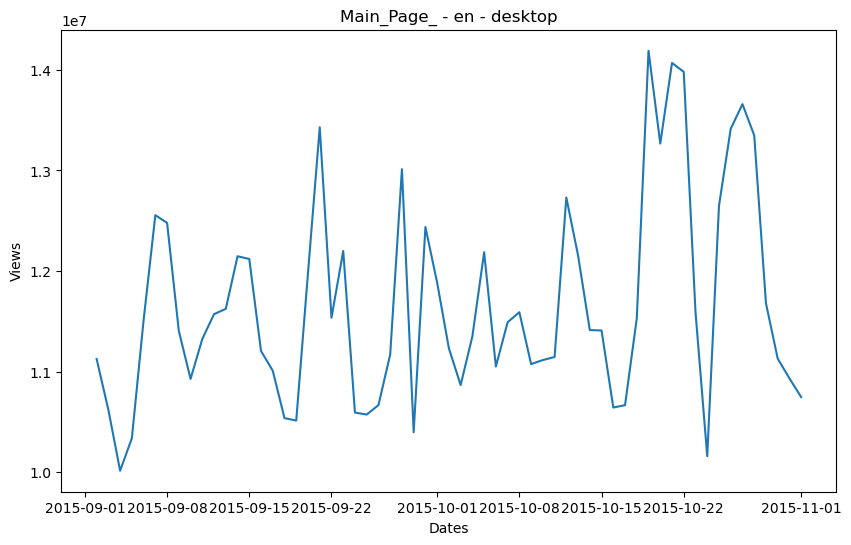

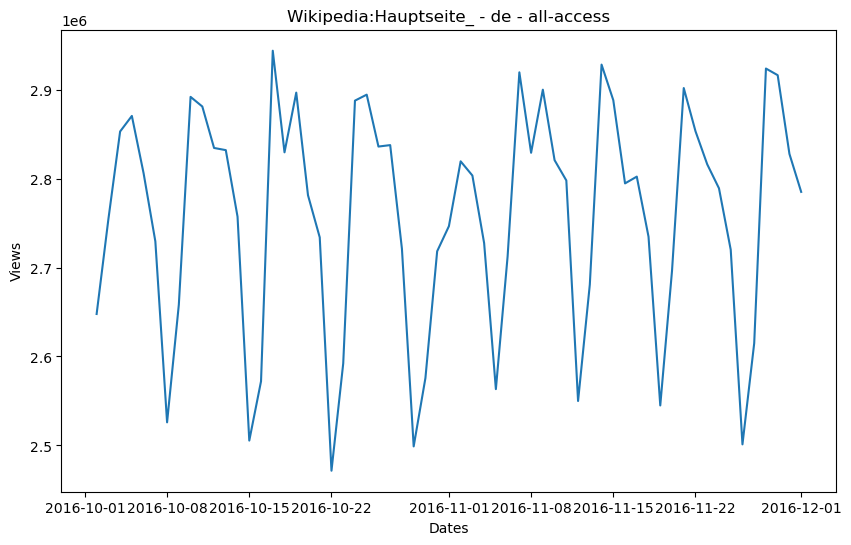

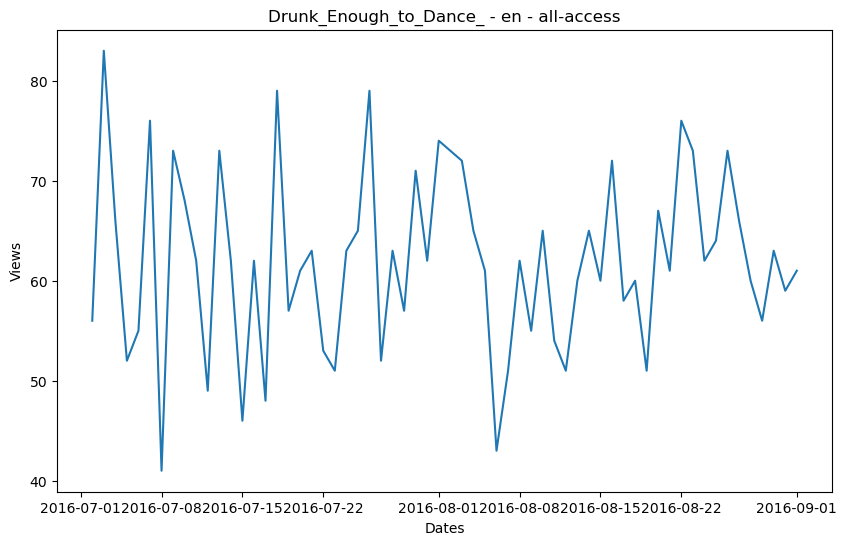

In [31]:
plot_rownr_zoom(10403, "2016-10-01", "2016-12-01")
plot_rownr_zoom(9774, "2015-09-01", "2015-11-01")
plot_rownr_zoom(139119, "2016-10-01", "2016-12-01")
plot_rownr_zoom(110657, "2016-07-01", "2016-09-01")

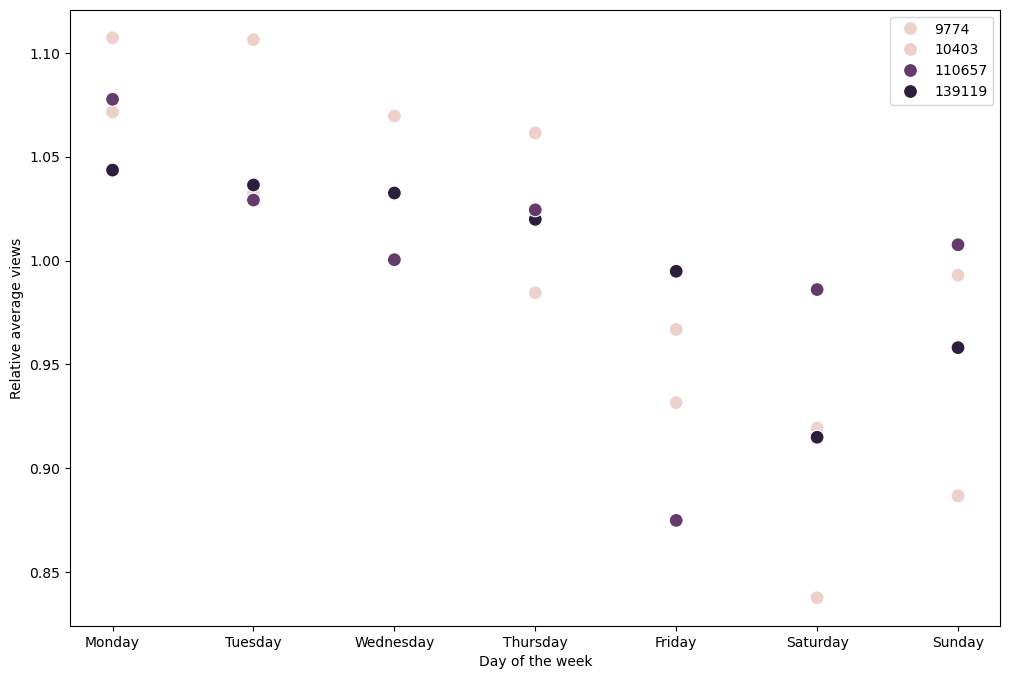

In [33]:
datasets = [
    {'rownr': 10403, 'start': '2016-10-01', 'end': '2016-12-01'},
    {'rownr': 9774, 'start': '2015-09-01', 'end': '2015-11-01'},
    {'rownr': 139119, 'start': '2016-10-01', 'end': '2016-12-01'},
    {'rownr': 110657, 'start': '2016-07-01', 'end': '2016-09-01'}
]

foo_list = []

for dataset in datasets:
    rownr, start, end = dataset.values()
    temp_df = extract_ts(rownr)
    temp_df = temp_df[(temp_df['dates'] > pd.to_datetime(start)) & (temp_df['dates'] < pd.to_datetime(end))]
    temp_df['dates'] = temp_df['dates'].dt.day_name()
    temp_df = temp_df.groupby('dates').agg({'views': 'mean'}).reset_index().rename(columns={'views': 'wday_views'})
    temp_df['wday_views'] = temp_df['wday_views'] / temp_df['wday_views'].mean()
    temp_df['id'] = rownr
    foo_list.append(temp_df)

foo = pd.concat(foo_list)

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
foo['dates'] = pd.Categorical(foo['dates'], categories=ordered_days, ordered=True)
                
# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=foo, x='dates', y='wday_views', hue='id', s=100)
plt.xlabel("Day of the week")
plt.ylabel("Relative average views")
plt.legend()
plt.show()

In [34]:
from scipy.signal import periodogram
from datetime import datetime

def plot_pds_rownr_zoom(rownr, start, end):
    art = pages.loc[pages['index'] == rownr, 'article'].values[0]
    loc = pages.loc[pages['index'] == rownr, 'locale'].values[0]
    acc = pages.loc[pages['index'] == rownr, 'access'].values[0]
    
    start_date = datetime.strptime(start, '%Y-%m-%d')
    end_date = datetime.strptime(end, '%Y-%m-%d')
    
    pds = extract_ts(rownr)
    pds = pds[(pds['dates'] > start_date) & (pds['dates'] < end_date)]
    
    # Compute the periodogram
    f, Pxx = periodogram(pds['views'])
    
    power = Pxx**2
    period = 1.0 / f
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.axvline(x=7, color='blue')
    plt.plot(period, power, color='black')
    plt.xscale('log')
    plt.xlabel('Period')
    plt.ylabel('Power')
    plt.title(f'PDS of {art} - {loc} - {acc}')
    plt.show()

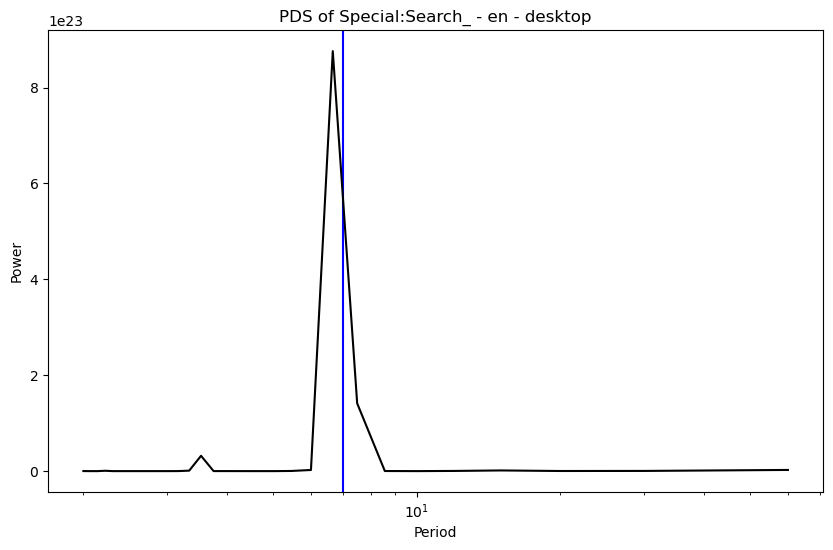

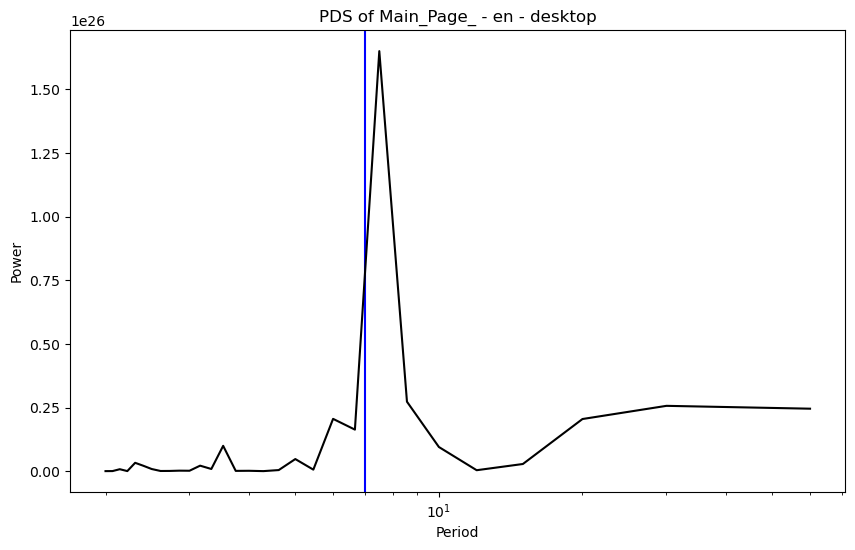

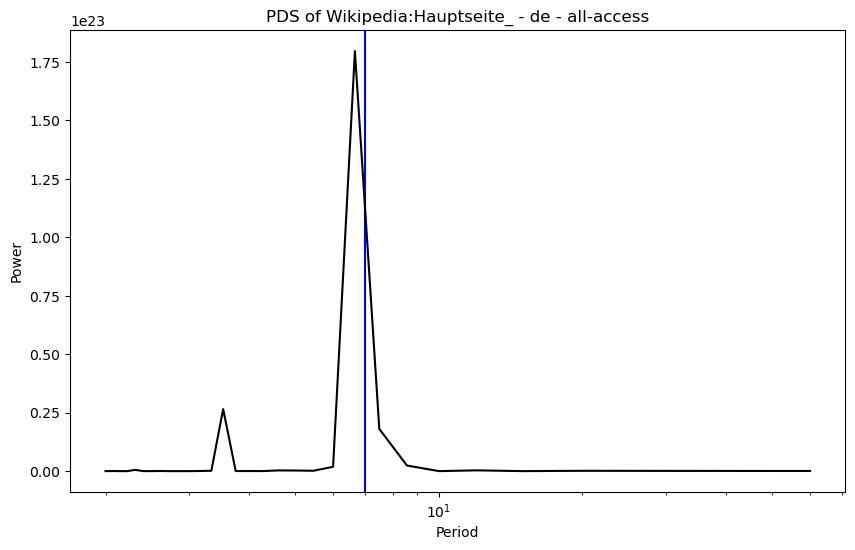

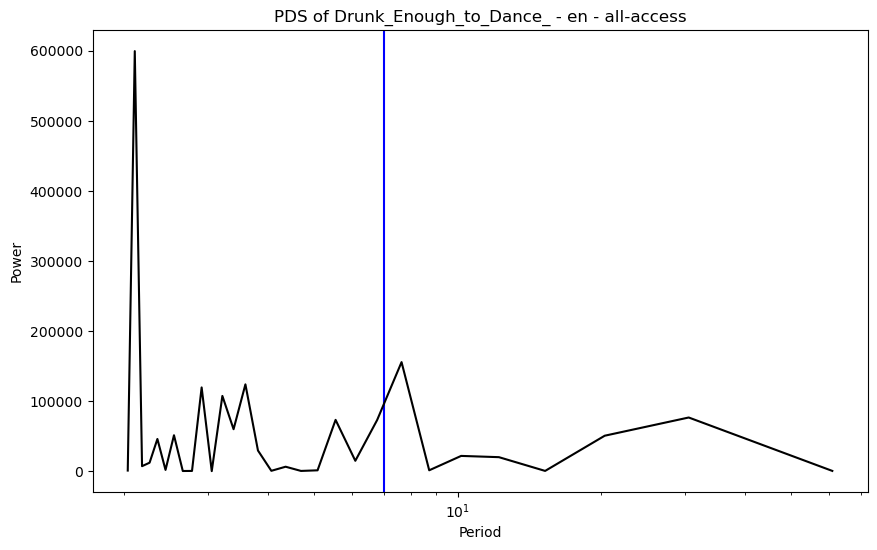

In [35]:
plot_pds_rownr_zoom(10403, "2016-10-01", "2016-12-01")
plot_pds_rownr_zoom(9774, "2015-09-01", "2015-11-01")
plot_pds_rownr_zoom(139119, "2016-10-01", "2016-12-01")
plot_pds_rownr_zoom(110657, "2016-07-01", "2016-09-01")

In [36]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

def plot_auto_arima_rownr(rownr):
    pageviews = extract_ts(rownr)
    pageviews.reset_index(inplace=True)
    pageviews['index'] = pageviews.index
    
    pred_len = 60
    pre_views = pageviews.iloc[:-pred_len]
    post_views = pageviews.iloc[-pred_len:]
    
    ts_data = pre_views['views']
    
    # Fit the ARIMA model
    arima_model = ARIMA(ts_data, order=(1, 1, 1), seasonal_order=(1, 1, 0, 7))
    arima_fit = arima_model.fit()
    
    # Forecast
    fc_views = arima_fit.get_forecast(steps=pred_len)
    fc_ci = fc_views.conf_int()

    fc_index = np.arange(len(ts_data), len(ts_data) + pred_len)

    # Plotting the forecast with confidence intervals
    plt.figure(figsize=(10, 6))
    plt.plot(pre_views['index'] / 7, pre_views['views'], label='Observed', color='black')
    plt.plot(fc_index / 7, fc_views.predicted_mean, label='Forecast', color='blue')
    plt.fill_between(fc_index / 7, fc_ci.iloc[:, 0], fc_ci.iloc[:, 1], color='blue', alpha=0.2)
    plt.plot(post_views['index'] / 7, post_views['views'], label='Actual', color='grey', linestyle='dotted')
    
    plt.xlabel("Time [weeks]")
    plt.ylabel("Views vs auto.arima predictions")
    plt.legend()
    plt.title(f"Auto ARIMA Forecast for rownr {rownr}")
    

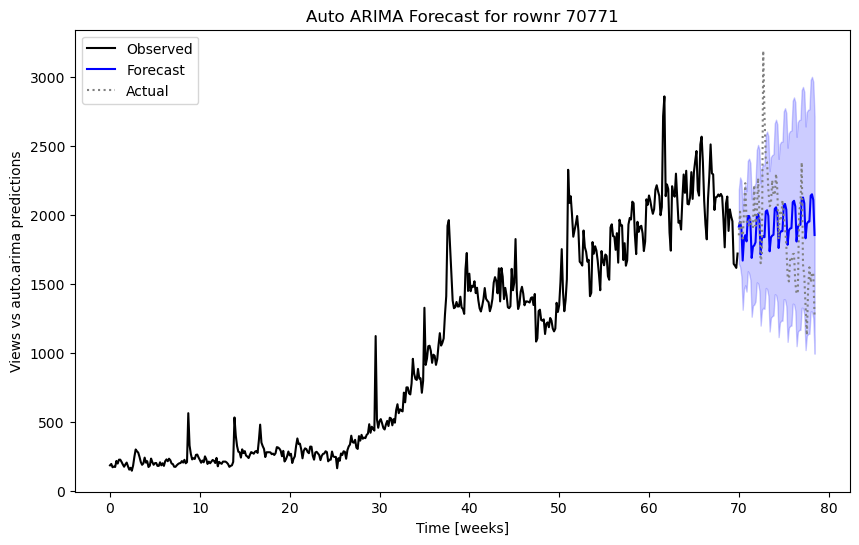

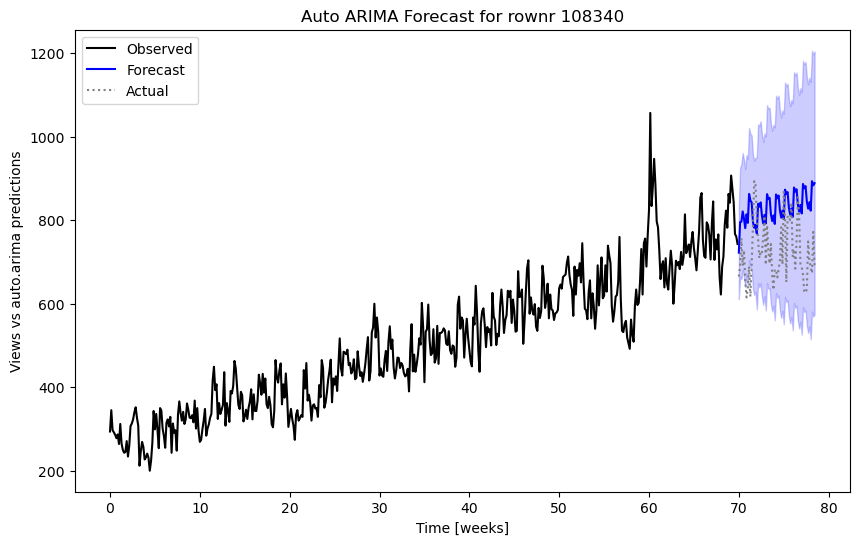

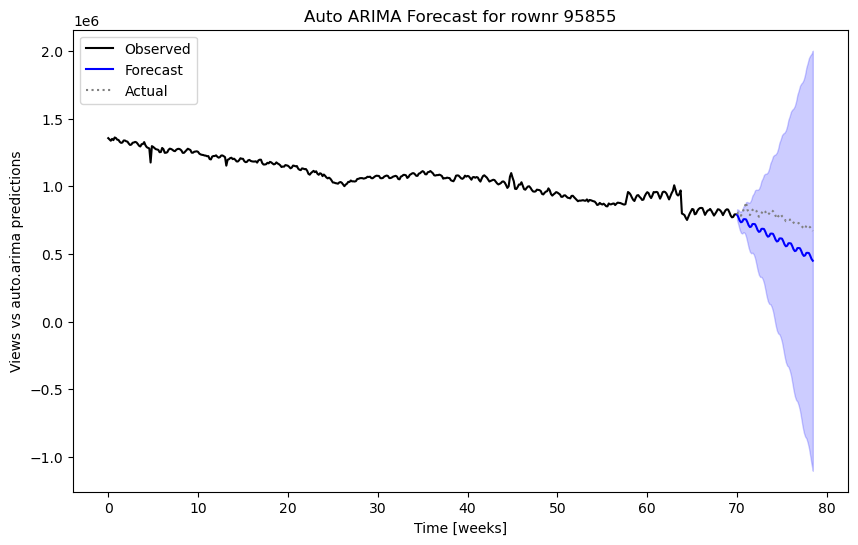

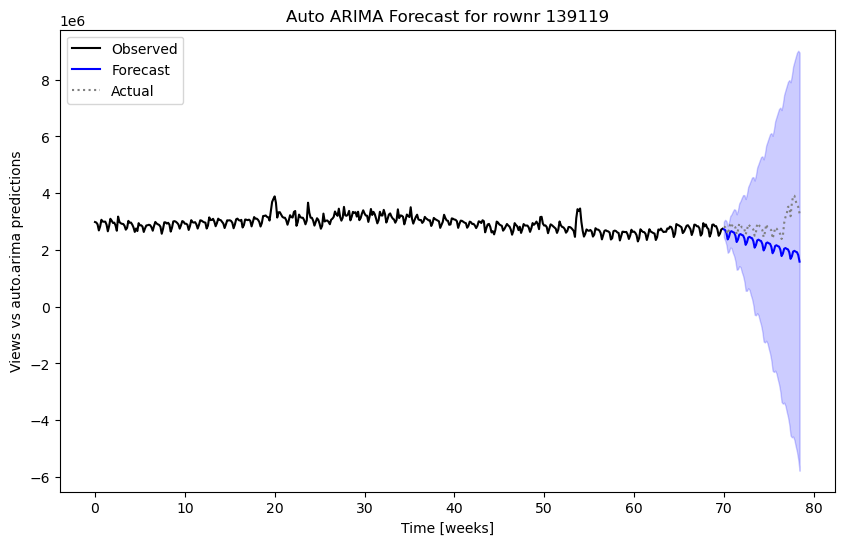

In [37]:
plot_auto_arima_rownr(70771)
plot_auto_arima_rownr(108340)
plot_auto_arima_rownr(95855)
plot_auto_arima_rownr(139119)

In [41]:
from prophet import Prophet
import cmdstanpy
cmdstanpy.install_cmdstan(compiler=True)

rownr = 139119
pageviews = extract_ts(rownr).rename(columns={'views': 'y', 'dates': 'ds'})

pred_len = 60
pre_views = pageviews.iloc[:-pred_len]
post_views = pageviews.iloc[-pred_len:]

# Initialize and fit the Prophet model
proph = Prophet(changepoint_prior_scale=0.5, yearly_seasonality=True, daily_seasonality=False)
proph.fit(pre_views)

# # Create a dataframe for future predictions
# future = proph.make_future_dataframe(periods=pred_len)

# # Make predictions

# fcast = proph.predict(future)

# # Plot the forecast
# fig = proph.plot(fcast)
# plt.title(f'Prophet Forecast for rownr {rownr}')
# plt.xlabel('Date')
# plt.ylabel('Views')

# # Optional: Overlay actual future data
# plt.plot(post_views['ds'], post_views['y'], 'r', label='Actual')
# plt.legend()

# plt.show()

18:29:21 - cmdstanpy - INFO - Add C++ toolchain to $PATH: C:\Users\khais\.cmdstan\RTools40


CmdStan install directory: C:\Users\khais\.cmdstan
Installing RTools40
C++ toolchain 'RTools' version: 4.0
Install directory: C:\Users\khais\.cmdstan
C++ toolchain RTools40 already installed
mingw32-make.exe already installed
CmdStan version 2.35.0 already installed
Test model compilation


18:29:29 - cmdstanpy - INFO - Chain [1] start processing
18:29:32 - cmdstanpy - INFO - Chain [1] done processing
18:29:32 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
18:29:32 - cmdstanpy - INFO - Chain [1] start processing
18:29:32 - cmdstanpy - INFO - Chain [1] done processing
18:29:32 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'C:\Users\khais\anaconda3\envs\time_series\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=76992 data file=C:\Users\khais\AppData\Local\Temp\tmpx0ryyx4g\3cvyqn9n.json init=C:\Users\khais\AppData\Local\Temp\tmpx0ryyx4g\59416ehz.json output file=C:\Users\khais\AppData\Local\Temp\tmpx0ryyx4g\prophet_model2ivvu_ih\prophet_model-20241014182932.csv method=optimize algorithm=newton iter=10000' failed: 